In [1]:
%reset -f

In [2]:
import psutil

# Mendapatkan informasi memori
mem_info = psutil.virtual_memory()

# Menampilkan sisa memori yang tersedia
print(f"Sisa memori tersedia: {mem_info.available / (1024 ** 2):.2f} MB")

Sisa memori tersedia: 1416.07 MB


# **New York City TLC Trip Record Data Dictionary**

This Capstone Project using 2 datasets from Newyork Open Data
https://data.cityofnewyork.us/Transportation/NYC-Taxi-Zones/d3c5-ddgc

1. NYC TLC Trip Record.csv for main data 
2. taxi zones.csv for ID Location reference

## **1. Feature Description**

| **Feature**              | **Description**                                                                                                                                               |
|--------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------|
| VendorID                 | A code indicating the LPEP provider that provided the record. <br> - 1 = Creative Mobile Technologies, LLC. <br> - 2 = VeriFone Inc.                        |
| lpep_pickup_datetime     | The date and time when the meter was engaged.                                                                                                                 |
| lpep_dropoff_datetime    | The date and time when the meter was disengaged.                                                                                                              |
| Passenger_count          | The number of passengers in the vehicle. This is a driver-entered value.                                                                                     |
| Trip_distance            | The elapsed trip distance in miles as reported by the taximeter.                                                                                             |
| PULocationID             | TLC Taxi Zone in which the taximeter was engaged.                                                                                                            |
| DOLocationID             | TLC Taxi Zone in which the taximeter was disengaged.                                                                                                         |
| RateCodeID               | The final rate code in effect at the end of the trip. <br> - 1 = Standard rate <br> - 2 = JFK <br> - 3 = Newark <br> - 4 = Nassau or Westchester <br> - 5 = Negotiated fare <br> - 6 = Group ride |
| Store_and_fwd_flag       | Indicates whether the trip record was held in vehicle memory before sending to the vendor due to lack of server connection. <br> - Y = Store and forward trip <br> - N = Not a store and forward trip |
| Payment_type             | Code for how the passenger paid for the trip. <br> - 1 = Credit card <br> - 2 = Cash <br> - 3 = No charge <br> - 4 = Dispute <br> - 5 = Unknown <br> - 6 = Voided trip |
| Fare_amount              | The time-and-distance fare calculated by the meter, including extras and surcharges like $0.50 and $1 rush hour and overnight charges.                      |
| MTA_tax                  | $0.50 MTA tax automatically triggered based on the metered rate in use.                                                                                      |
| Improvement_surcharge    | $0.30 improvement surcharge assessed on hailed trips at flag drop; introduced in 2015.                                                                       |
| Tip_amount               | Automatically populated for credit card tips. Cash tips are not included.                                                                                    |
| Tolls_amount             | The total amount of all tolls paid during the trip.                                                                                                          |
| Total_amount             | The total amount charged to passengers, excluding cash tips.                                                                                                 |
| Trip_type                | Code indicating whether the trip was a street-hail or a dispatch. Automatically assigned but can be modified by the driver. <br> - 1 = Street-hail <br> - 2 = Dispatch |


``total_amount`` = ``fare_amount`` + ``extra`` + ``mta_tax`` + ``tip_amount`` + ``tolls_amount`` + ``ehail_fee`` + ``improvement_surcharge``

## **2. Load Dataset**

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('./data/NYC TLC Trip Record.csv', low_memory=False)
df.head(3)

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,N,1.0,166,143,1.0,2.58,14.9,1.0,0.5,4.03,0.0,NaN,1.0,24.18,1.0,1.0,2.75
1,2,2023-01-01 00:51:03,2023-01-01 00:57:49,N,1.0,24,43,1.0,1.81,10.7,1.0,0.5,2.64,0.0,NaN,1.0,15.84,1.0,1.0,0.00
2,2,2023-01-01 00:35:12,2023-01-01 00:41:32,N,1.0,223,179,1.0,0.00,7.2,1.0,0.5,1.94,0.0,NaN,1.0,11.64,1.0,1.0,0.00


In [5]:
df_zone = pd.read_csv('./data/taxi_zone_ID.csv')
df_zone.head(2)

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone


## **3. Data Preprocessing**

##### 3.1. Checking data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68211 entries, 0 to 68210
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               68211 non-null  int64  
 1   lpep_pickup_datetime   68211 non-null  object 
 2   lpep_dropoff_datetime  68211 non-null  object 
 3   store_and_fwd_flag     63887 non-null  object 
 4   RatecodeID             63887 non-null  float64
 5   PULocationID           68211 non-null  int64  
 6   DOLocationID           68211 non-null  int64  
 7   passenger_count        63887 non-null  float64
 8   trip_distance          68211 non-null  float64
 9   fare_amount            68211 non-null  float64
 10  extra                  68211 non-null  float64
 11  mta_tax                68211 non-null  float64
 12  tip_amount             68211 non-null  float64
 13  tolls_amount           68211 non-null  float64
 14  ehail_fee              0 non-null      float64
 15  im

In [7]:
# menghapus kolom yang tidak diperlukan
df.drop(columns=['ehail_fee', 'store_and_fwd_flag'], inplace=True)

In [8]:
df.describe()

,VendorID,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,68211.000000,63887.000000,68211.000000,68211.000000,63887.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,68211.000000,63887.000000,63877.000000,63887.000000
mean,1.863028,1.117160,98.549735,138.429901,1.315870,8.114852,16.603545,0.825431,0.588340,2.139012,0.169627,0.951625,21.789377,1.373613,1.021933,0.726748
std,0.343820,1.372913,61.244314,76.761311,0.979054,585.105955,13.470121,1.269904,0.385819,3.052710,1.099789,0.196875,15.457115,0.508039,0.146465,1.212836
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-70.000000,-2.500000,-0.500000,-10.500000,0.000000,-1.000000,-71.500000,1.000000,1.000000,-2.750000
25%,2.000000,1.000000,74.000000,74.000000,1.000000,1.110000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.900000,1.000000,1.000000,0.000000
50%,2.000000,1.000000,75.000000,138.000000,1.000000,1.850000,13.500000,0.000000,0.500000,1.600000,0.000000,1.000000,17.900000,1.000000,1.000000,0.000000
75%,2.000000,1.000000,129.000000,219.000000,1.000000,3.210000,19.800000,1.000000,0.500000,3.330000,0.000000,1.000000,26.150000,2.000000,1.000000,2.750000
max,2.000000,99.000000,265.000000,265.000000,9.000000,120098.840000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000


In [9]:
df.duplicated().sum()

0

#### 3.2. Data distribution and Removing global outliers

In [10]:
cols_num = [col for col in df.describe().columns]
len(cols_num)

16

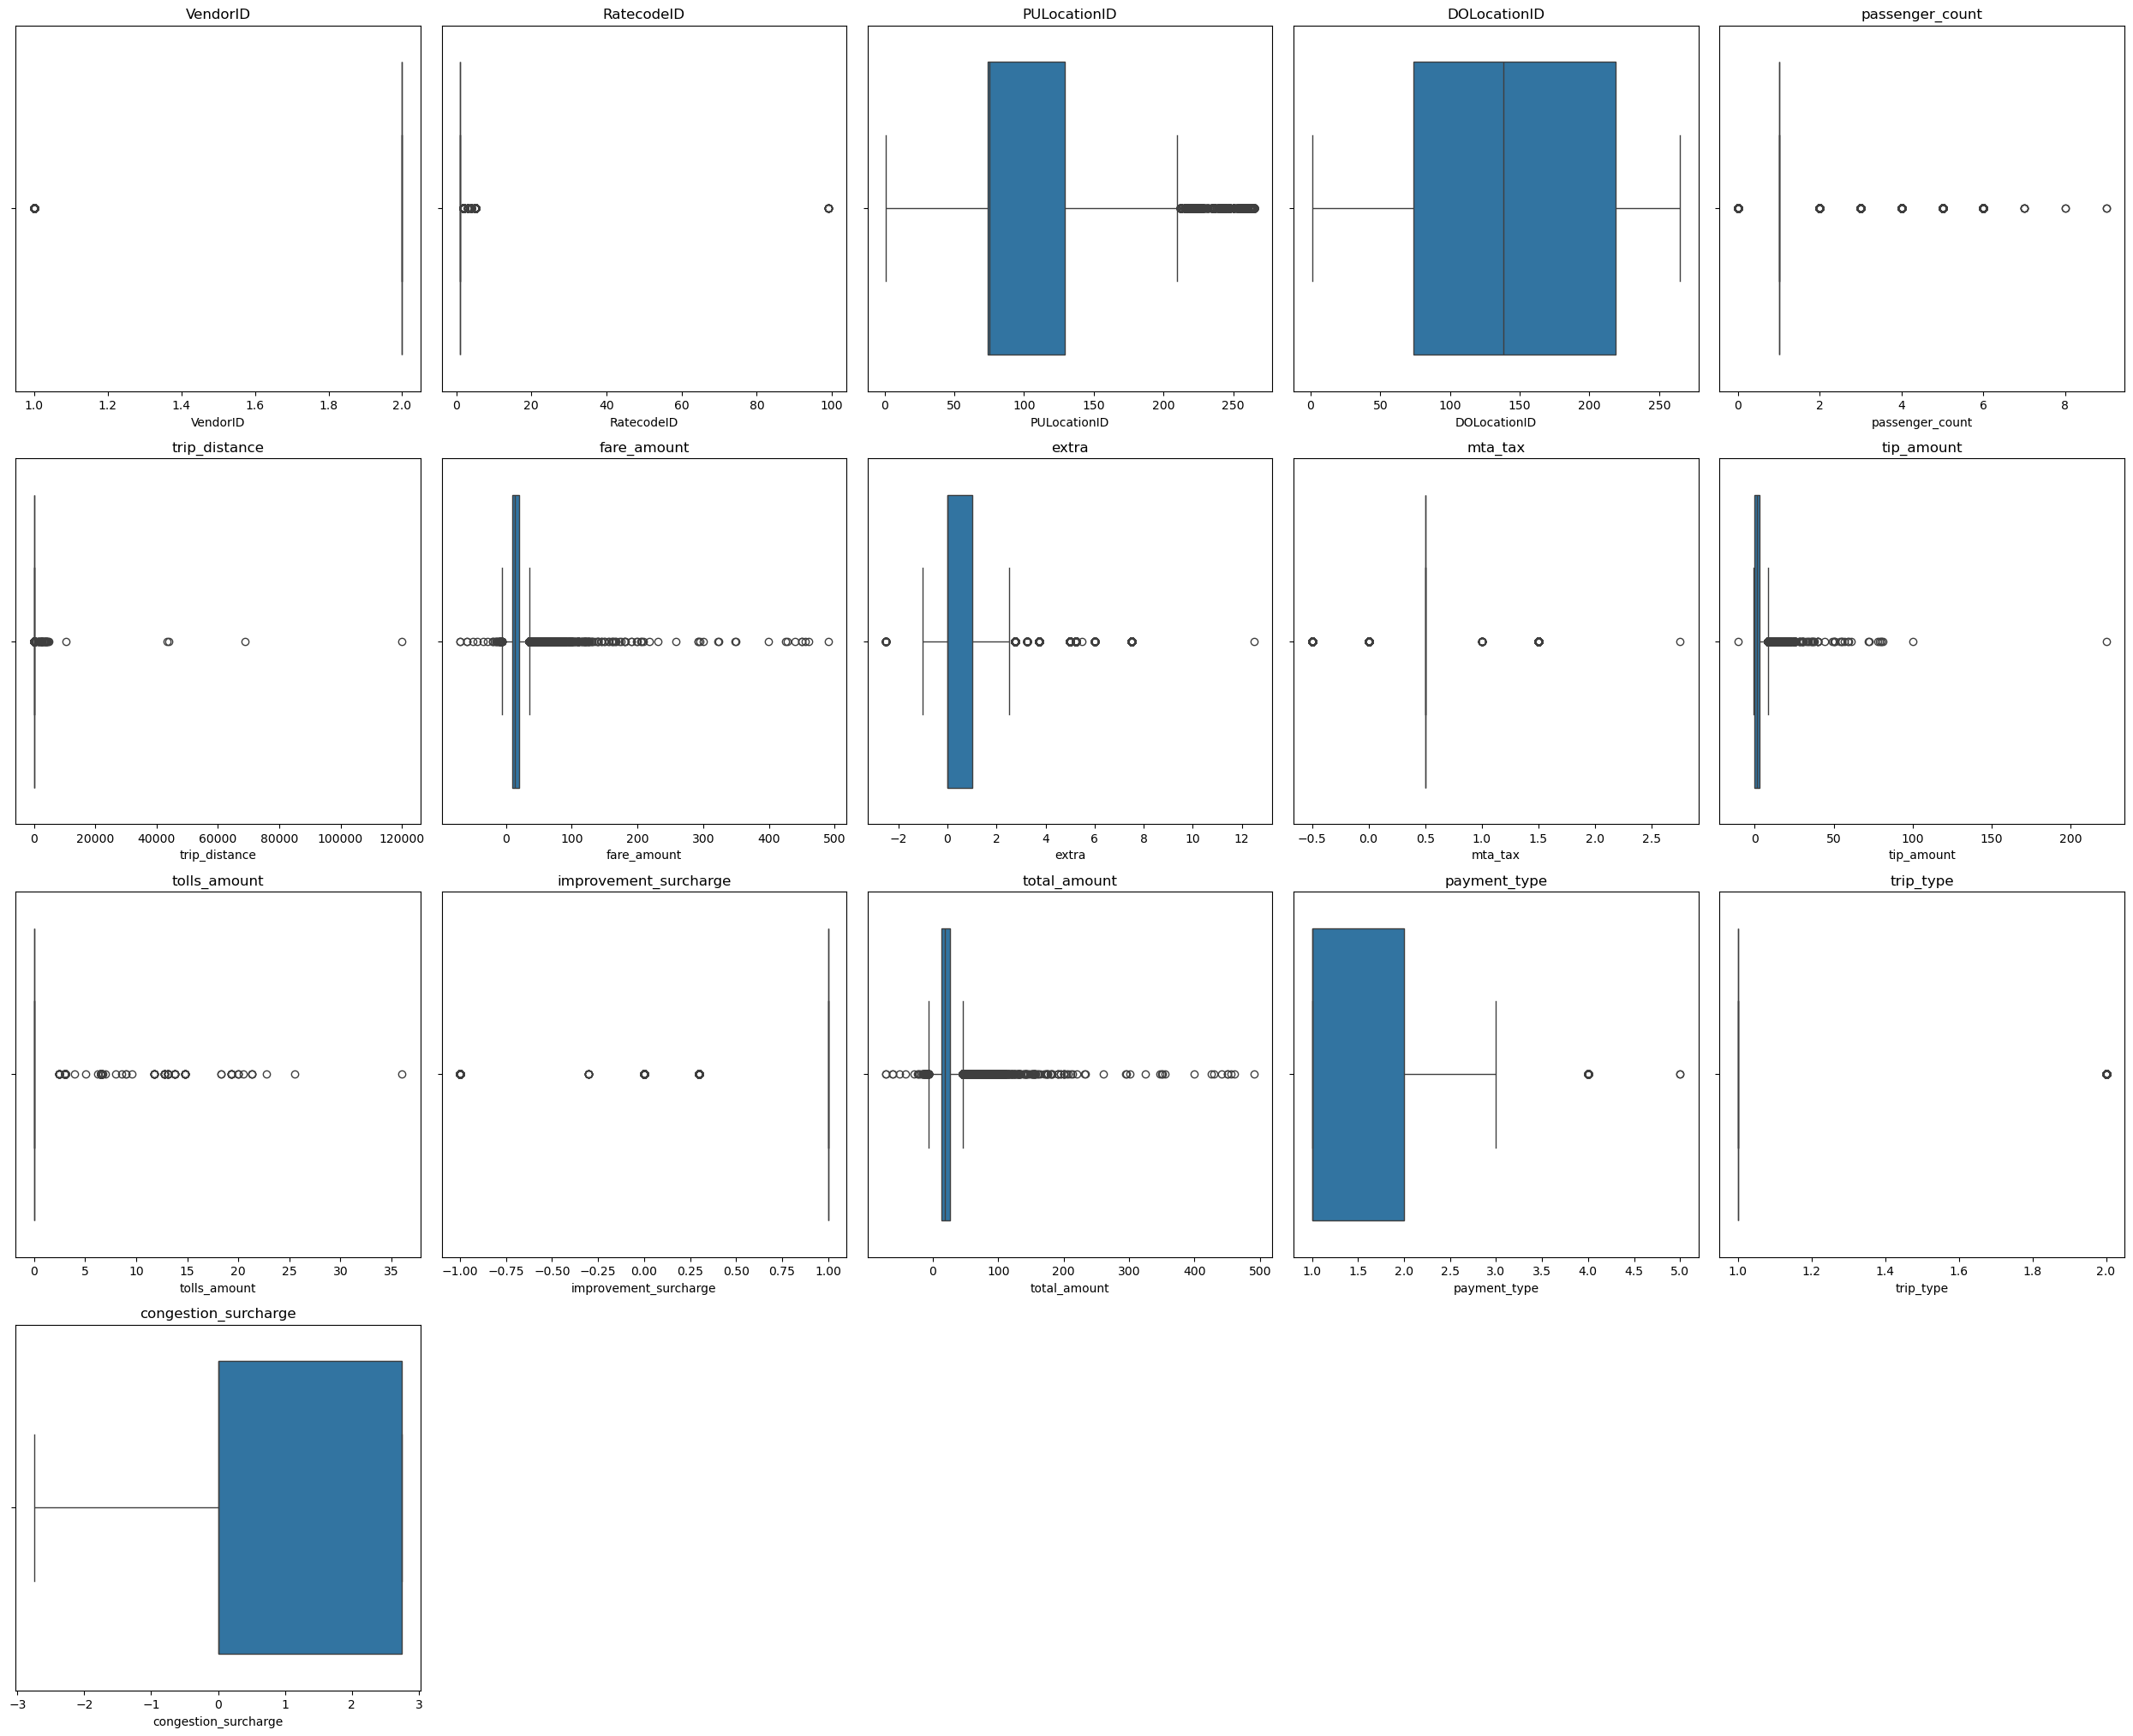

In [11]:
plt.figure(figsize=(25, 25))  

for index, kolom in enumerate(cols_num, 1):
    plt.subplot(5, 5, index)  
    sns.boxplot(x = df[kolom])            # Boxplot tiap kolom
    plt.title(kolom)                      
    plt.tight_layout()                    # Atur agar subplot tidak tumpang tindih

plt.show()

global outliers

In [12]:
rate = [1, 2, 3, 4, 5]
df = df.drop(df[~df['RatecodeID'].isin(rate)].index)

In [13]:
df = df.drop(df[df['extra']>12].index)  

In [14]:
df = df.drop(df[df['trip_distance']>1500].index)

In [15]:
df = df.drop(df[df['tip_amount']>200].index)

#### 3.3. Handling anomaly data

mengganti data bernilai 0 yang tidak relevan

In [16]:
# mengganti total amount bernilai 0 dengan penjumlahan kolom lain
amount = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge']

df.loc[df['total_amount'] == 0, 'total_amount'] = df[amount].sum(axis=1)

In [17]:
# ganti passenger count bernilai 0 dengan modus
df['passenger_count'] = df['passenger_count'].replace(to_replace=0, value=df['passenger_count'].mode()[0]);

In [18]:
# menghapus kolom yang tidak diperlukan untuk analisis perilaku pelanggan
df = df.drop(columns=['VendorID','extra','mta_tax','improvement_surcharge'])

menghapus ada 2 LocationID yang tidak terdapat pada data taxi_zones

In [19]:
trying = [num for num in df['PULocationID'].unique() if num not in df_zone['LocationID'].unique()]
trying

[264, 265]

In [20]:
trying2 = [num for num in df['DOLocationID'].unique() if num not in df_zone['LocationID'].unique()]
trying2

[265, 264]

In [21]:
# Hapus data yang memiliki PULocation ID 264 dan 265
df = df[~df['PULocationID'].isin([264, 265])]

# Hapus data yang memiliki DOLocation ID 264 dan 265
df = df[~df['DOLocationID'].isin([264, 265])]

menghapus data bernilai negatif

In [22]:
df.describe()

,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,total_amount,payment_type,trip_type,congestion_surcharge
count,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000,63184.000000
mean,1.083819,97.096211,137.053162,1.322170,2.527347,15.867600,2.032517,0.139340,20.995215,1.373212,1.018153,0.734312
std,0.565007,59.445940,76.190219,0.976351,2.510862,12.497059,2.789719,0.981406,14.355835,0.507549,0.133507,1.216851
min,1.000000,3.000000,1.000000,1.000000,0.000000,-70.000000,-10.500000,0.000000,-71.500000,1.000000,1.000000,-2.750000
25%,1.000000,74.000000,74.000000,1.000000,1.100000,9.000000,0.000000,0.000000,12.600000,1.000000,1.000000,0.000000
50%,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,1.460000,0.000000,17.450000,1.000000,1.000000,0.000000
75%,1.000000,116.000000,216.000000,1.000000,3.040000,19.100000,3.220000,0.000000,25.300000,2.000000,1.000000,2.750000
max,5.000000,263.000000,263.000000,9.000000,66.180000,490.000000,80.880000,36.050000,491.000000,5.000000,2.000000,2.750000


In [23]:
df.shape

(63184, 14)

In [24]:
cols_num = [col for col in df.describe().columns]

for col in cols_num:
    df = df[df[col] >= 0]  

df.shape

(63016, 14)

#### 3.4. Convert data types

In [25]:
df[['RatecodeID','PULocationID', 'DOLocationID', 'passenger_count', 'payment_type', 'trip_type']] = df[['RatecodeID','PULocationID', 'DOLocationID', 'passenger_count', 'payment_type', 'trip_type']].astype('int64');

In [26]:
df['lpep_pickup_datetime'] = pd.to_datetime(df['lpep_pickup_datetime'])
df['lpep_dropoff_datetime'] = pd.to_datetime(df['lpep_dropoff_datetime'])

#### 3.5. Parse the columns to make them more informative

In [27]:
df['trip_duration'] = df['lpep_dropoff_datetime'] - df['lpep_pickup_datetime']
df['trip_duration'] = df['trip_duration'].dt.total_seconds() / 60

In [28]:
df['PU_hour'] = df['lpep_pickup_datetime'].dt.hour
df['DO_hour'] = df['lpep_dropoff_datetime'].dt.hour

df['PU_month'] = df['lpep_pickup_datetime'].dt.month
df['DO_month'] = df['lpep_dropoff_datetime'].dt.month

df['PU_year'] = df['lpep_pickup_datetime'].dt.year
df['DO_year'] = df['lpep_dropoff_datetime'].dt.year

df['PU_day'] = df['lpep_pickup_datetime'].dt.day_name()
df['DO_day'] = df['lpep_dropoff_datetime'].dt.day_name()

In [29]:
def change_PU_ID():
    mask = df['PULocationID'].isin(df_zone['LocationID'])
    df.loc[mask, 'PU_borough'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'PULocationID'], 'Borough'].values
    df.loc[mask, 'PU_zone'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'PULocationID'], 'Zone'].values
    df.loc[mask, 'PU_service_zone'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'PULocationID'], 'service_zone'].values

def change_DO_ID():
    mask = df['DOLocationID'].isin(df_zone['LocationID'])
    df.loc[mask, 'DO_borough'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'DOLocationID'], 'Borough'].values
    df.loc[mask, 'DO_zone'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'DOLocationID'], 'Zone'].values
    df.loc[mask, 'DO_service_zone'] = df_zone.set_index('LocationID').loc[df.loc[mask, 'DOLocationID'], 'service_zone'].values

change_PU_ID()
change_DO_ID()

In [30]:
df['route_borough'] = df['PU_borough'] + ' - ' + df['DO_borough']
df['route_zone'] = df['PU_zone'] + ' - ' + df['DO_zone']
df['route_service_zone'] = df['PU_service_zone'] + ' - ' + df['DO_service_zone']

In [31]:
df.head(2)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,...,DO_day,PU_borough,PU_zone,PU_service_zone,DO_borough,DO_zone,DO_service_zone,route_borough,route_zone,route_service_zone
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,0.0,...,Sunday,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Manhattan - Manhattan,Morningside Heights - Lincoln Square West,Boro Zone - Yellow Zone
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,24,43,1,1.81,10.7,2.64,0.0,...,Sunday,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone,Manhattan - Manhattan,Bloomingdale - Central Park,Yellow Zone - Yellow Zone


In [32]:
df = df.drop(df[(df['PU_year'] == 2009) | (df['PU_year'] == 2022)].index)

#### 3.6. Handling anomaly data part 2

menangani data bernilai 0 yang tidak relevan

Kesalahan mungkin terjadi saat input data, data yang tidak mungkin 0 di dunia nyata :
- passenger count
- trip distance
- fare amount
- total amount
- trip duration

In [33]:
columns_zero = df.columns[(df == 0).any()].tolist()
columns_zero

['trip_distance',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'trip_duration',
 'PU_hour',
 'DO_hour']

In [34]:
# dataframe dengan data 0 yang tidak relevam
zero_dist = df[df['trip_distance'] == df['trip_distance'].min()][['trip_distance', 'trip_duration', 'fare_amount', 'total_amount', 'route_borough', 'route_zone']]
zero_durat = df[df['trip_duration'] == df['trip_duration'].min()][['trip_distance', 'trip_duration', 'fare_amount', 'total_amount', 'route_borough', 'route_zone']]
zero_fare = df[df['fare_amount'] == df['fare_amount'].min()][['trip_distance', 'trip_duration', 'fare_amount', 'total_amount', 'route_borough', 'route_zone']]

zero_dist = pd.concat([zero_dist, zero_durat, zero_fare]).drop_duplicates().reset_index(drop=True)

In [35]:
avg_table = df.groupby('route_zone')[['trip_distance','trip_duration', 'fare_amount']].mean().reset_index()
avg_table.rename(columns={'trip_distance':'avg_trip_distance', 'trip_duration':'avg_trip_duration', 'fare_amount':'avg_fare_amount'}, inplace=True);
len(avg_table)

4952

In [36]:
df.shape

(63013, 32)

In [37]:
merged_df = pd.merge(zero_dist, avg_table, on='route_zone', how='left')

In [38]:
df = df.merge(merged_df[['route_zone', 'avg_trip_distance', 'avg_trip_duration', 'avg_fare_amount']], on='route_zone', how='left', suffixes=('', '_merged'))
df.head(1)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,...,PU_service_zone,DO_borough,DO_zone,DO_service_zone,route_borough,route_zone,route_service_zone,avg_trip_distance,avg_trip_duration,avg_fare_amount
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,0.0,...,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Manhattan - Manhattan,Morningside Heights - Lincoln Square West,Boro Zone - Yellow Zone,NaN,NaN,NaN


In [39]:
df = df.drop_duplicates()
df.shape

(63013, 35)

In [40]:
# Mengganti nilai 0 pada 'trip_distance' di df dengan nilai dari 'trip_distance_merged'
df['trip_distance'] = df['trip_distance'].mask(df['trip_distance'] == 0.0, df['avg_trip_distance'])
df['trip_duration'] = df['trip_duration'].mask(df['trip_duration'] == 0.0, df['avg_trip_duration'])
df['fare_amount'] = df['fare_amount'].mask(df['fare_amount'] == 0.0, df['avg_fare_amount'])


df.head(1)

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,...,PU_service_zone,DO_borough,DO_zone,DO_service_zone,route_borough,route_zone,route_service_zone,avg_trip_distance,avg_trip_duration,avg_fare_amount
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,166,143,1,2.58,14.9,4.03,0.0,...,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone,Manhattan - Manhattan,Morningside Heights - Lincoln Square West,Boro Zone - Yellow Zone,NaN,NaN,NaN


In [41]:
df = df.drop(columns=['avg_trip_distance', 'avg_trip_duration', 'avg_fare_amount'])

In [42]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
PU_hour                  0
DO_hour                  0
PU_month                 0
DO_month                 0
PU_year                  0
DO_year                  0
PU_day                   0
DO_day                   0
PU_borough               0
PU_zone                  0
PU_service_zone          0
DO_borough               0
DO_zone                  0
DO_service_zone          0
route_borough            0
route_zone               0
route_service_zone       0
dtype: int64

In [43]:
df[df['trip_distance']==0]

,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,...,DO_day,PU_borough,PU_zone,PU_service_zone,DO_borough,DO_zone,DO_service_zone,route_borough,route_zone,route_service_zone
1398,2023-01-01 03:09:23,2023-01-01 03:20:36,5,145,162,1,0.0,40.0,8.75,0.0,...,Sunday,Queens,Long Island City/Hunters Point,Boro Zone,Manhattan,Midtown East,Yellow Zone,Queens - Manhattan,Long Island City/Hunters Point - Midtown East,Boro Zone - Yellow Zone
2033,2023-01-01 09:35:12,2023-01-01 09:47:56,1,213,167,1,0.0,20.5,0.00,0.0,...,Sunday,Bronx,Soundview/Castle Hill,Boro Zone,Bronx,Morrisania/Melrose,Boro Zone,Bronx - Bronx,Soundview/Castle Hill - Morrisania/Melrose,Boro Zone - Boro Zone
2083,2023-01-01 09:14:47,2023-01-01 09:36:22,1,14,17,1,0.0,32.5,0.00,0.0,...,Sunday,Brooklyn,Bay Ridge,Boro Zone,Brooklyn,Bedford,Boro Zone,Brooklyn - Brooklyn,Bay Ridge - Bedford,Boro Zone - Boro Zone
2866,2023-01-01 12:34:12,2023-01-01 12:52:53,1,72,76,1,0.0,19.5,0.00,0.0,...,Sunday,Brooklyn,East Flatbush/Remsen Village,Boro Zone,Brooklyn,East New York,Boro Zone,Brooklyn - Brooklyn,East Flatbush/Remsen Village - East New York,Boro Zone - Boro Zone
3253,2023-01-01 13:44:07,2023-01-01 14:02:06,1,22,227,1,0.0,15.2,0.00,0.0,...,Sunday,Brooklyn,Bensonhurst West,Boro Zone,Brooklyn,Sunset Park East,Boro Zone,Brooklyn - Brooklyn,Bensonhurst West - Sunset Park East,Boro Zone - Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472839,2023-01-31 13:09:40,2023-01-31 13:54:19,1,14,205,1,0.0,55.5,0.00,0.0,...,Tuesday,Brooklyn,Bay Ridge,Boro Zone,Queens,Saint Albans,Boro Zone,Brooklyn - Queens,Bay Ridge - Saint Albans,Boro Zone - Boro Zone
473849,2023-01-31 14:00:58,2023-01-31 14:01:07,5,16,16,1,0.0,28.0,7.38,0.0,...,Tuesday,Queens,Bayside,Boro Zone,Queens,Bayside,Boro Zone,Queens - Queens,Bayside - Bayside,Boro Zone - Boro Zone
474980,2023-01-31 15:02:44,2023-01-31 15:02:48,5,198,198,1,0.0,25.0,0.00,0.0,...,Tuesday,Queens,Ridgewood,Boro Zone,Queens,Ridgewood,Boro Zone,Queens - Queens,Ridgewood - Ridgewood,Boro Zone - Boro Zone
475520,2023-01-31 16:39:55,2023-01-31 17:04:30,1,241,254,1,0.0,21.5,0.00,0.0,...,Tuesday,Bronx,Van Cortlandt Village,Boro Zone,Bronx,Williamsbridge/Olinville,Boro Zone,Bronx - Bronx,Van Cortlandt Village - Williamsbridge/Olinville,Boro Zone - Boro Zone


#### 3.7. Handling Nan Values using Imputer

In [44]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
PU_hour                  0
DO_hour                  0
PU_month                 0
DO_month                 0
PU_year                  0
DO_year                  0
PU_day                   0
DO_day                   0
PU_borough               0
PU_zone                  0
PU_service_zone          0
DO_borough               0
DO_zone                  0
DO_service_zone          0
route_borough            0
route_zone               0
route_service_zone       0
dtype: int64

- trip_type                4334 (int64) : iterative imputer 
- RatecodeID               4324 (int64) : KNN imputer
- passenger_count          4324 (int64) : KNN imputer
- payment_type             4324 (int64) : KNN imputer
- congestion_surcharge     4324 (float64) : most_frequent

In [45]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, SimpleImputer

simp_imp = SimpleImputer(strategy='most_frequent')
knn_imp = KNNImputer()
iter_imp = IterativeImputer()

df['trip_type'] = iter_imp.fit_transform(df[['trip_type']])
df['RatecodeID'] = knn_imp.fit_transform(df[['RatecodeID']])
df['passenger_count'] = knn_imp.fit_transform(df[['passenger_count']])
df['payment_type'] = knn_imp.fit_transform(df[['payment_type']])
df['congestion_surcharge'] = simp_imp.fit_transform(df[['congestion_surcharge']])

In [46]:
df.isna().sum()

lpep_pickup_datetime     0
lpep_dropoff_datetime    0
RatecodeID               0
PULocationID             0
DOLocationID             0
passenger_count          0
trip_distance            0
fare_amount              0
tip_amount               0
tolls_amount             0
total_amount             0
payment_type             0
trip_type                0
congestion_surcharge     0
trip_duration            0
PU_hour                  0
DO_hour                  0
PU_month                 0
DO_month                 0
PU_year                  0
DO_year                  0
PU_day                   0
DO_day                   0
PU_borough               0
PU_zone                  0
PU_service_zone          0
DO_borough               0
DO_zone                  0
DO_service_zone          0
route_borough            0
route_zone               0
route_service_zone       0
dtype: int64

#### 3.8. Label encoding for day name

In [47]:
df['PU_day'].value_counts()

PU_day
Tuesday      10468
Thursday      9432
Monday        9243
Friday        9196
Wednesday     9177
Saturday      7847
Sunday        7650
Name: count, dtype: int64

In [48]:
from sklearn.preprocessing import OrdinalEncoder
day_order = [['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']]

ordinal_encoder = OrdinalEncoder(categories=day_order)
df['PU_day'].astype(str)
df['DO_day'].astype(str)

df['PU_day_enc'] = ordinal_encoder.fit_transform(df[['PU_day']])
df['DO_day_enc'] = ordinal_encoder.fit_transform(df[['DO_day']])

In [49]:
df[['PU_day_enc', 'DO_day_enc']] = df[['PU_day_enc', 'DO_day_enc']].astype('int64')

#### 3.9. Binning data

In [50]:
def categorize_time(hour):
    if hour ==0:
        return 'midnight'
    elif 1<= hour < 12:
        return 'morning'
    elif 12<= hour < 17:
        return 'afternoon'
    elif 17<= hour < 21:
        return 'evening'
    else : 
        return 'night'
    
df['PU_hour_cat'] = df['PU_hour'].apply(categorize_time)
df['DO_hour_cat'] = df['DO_hour'].apply(categorize_time)  

In [51]:
def categorize_day(day):
    if day in ['Saturday', 'Sunday']:
        return 'weekend'
    else :
        return 'weekday'
df['PU_day_cat'] = df['PU_day'].apply(categorize_day)
df['DO_day_cat'] = df['DO_day'].apply(categorize_day)      

In [52]:
def categorize_distance(distance):
    if distance <= 1.5:
        return '0 - 1.5 miles'
    elif distance <= 3.0:
        return '1.5 - 3 miles'
    elif distance <= 5.0:
        return '3 - 5 miles'
    elif distance <= 10.0:
        return '5 - 10 miles'
    else:
        return '> 10 miles'
df['dist_cat'] = df['trip_distance'].apply(categorize_distance)

In [53]:
def categorize_duration(duration):
    if duration <= 10:
        return '0 - 10 minutes'
    elif duration <= 20:
        return '10 - 20 minutes'
    elif duration <= 30:
        return '20 - 30 minutes'
    elif duration <= 60:
        return '<= 60 minutes'
    else:
        return '> 60 minutes'
df['durat_cat'] = df['trip_duration'].apply(categorize_duration)

#### 3.10. Considering outlier data and choosing not to remove it

In [54]:
cols_num = [col for col in df.describe().columns]
len(cols_num)

23

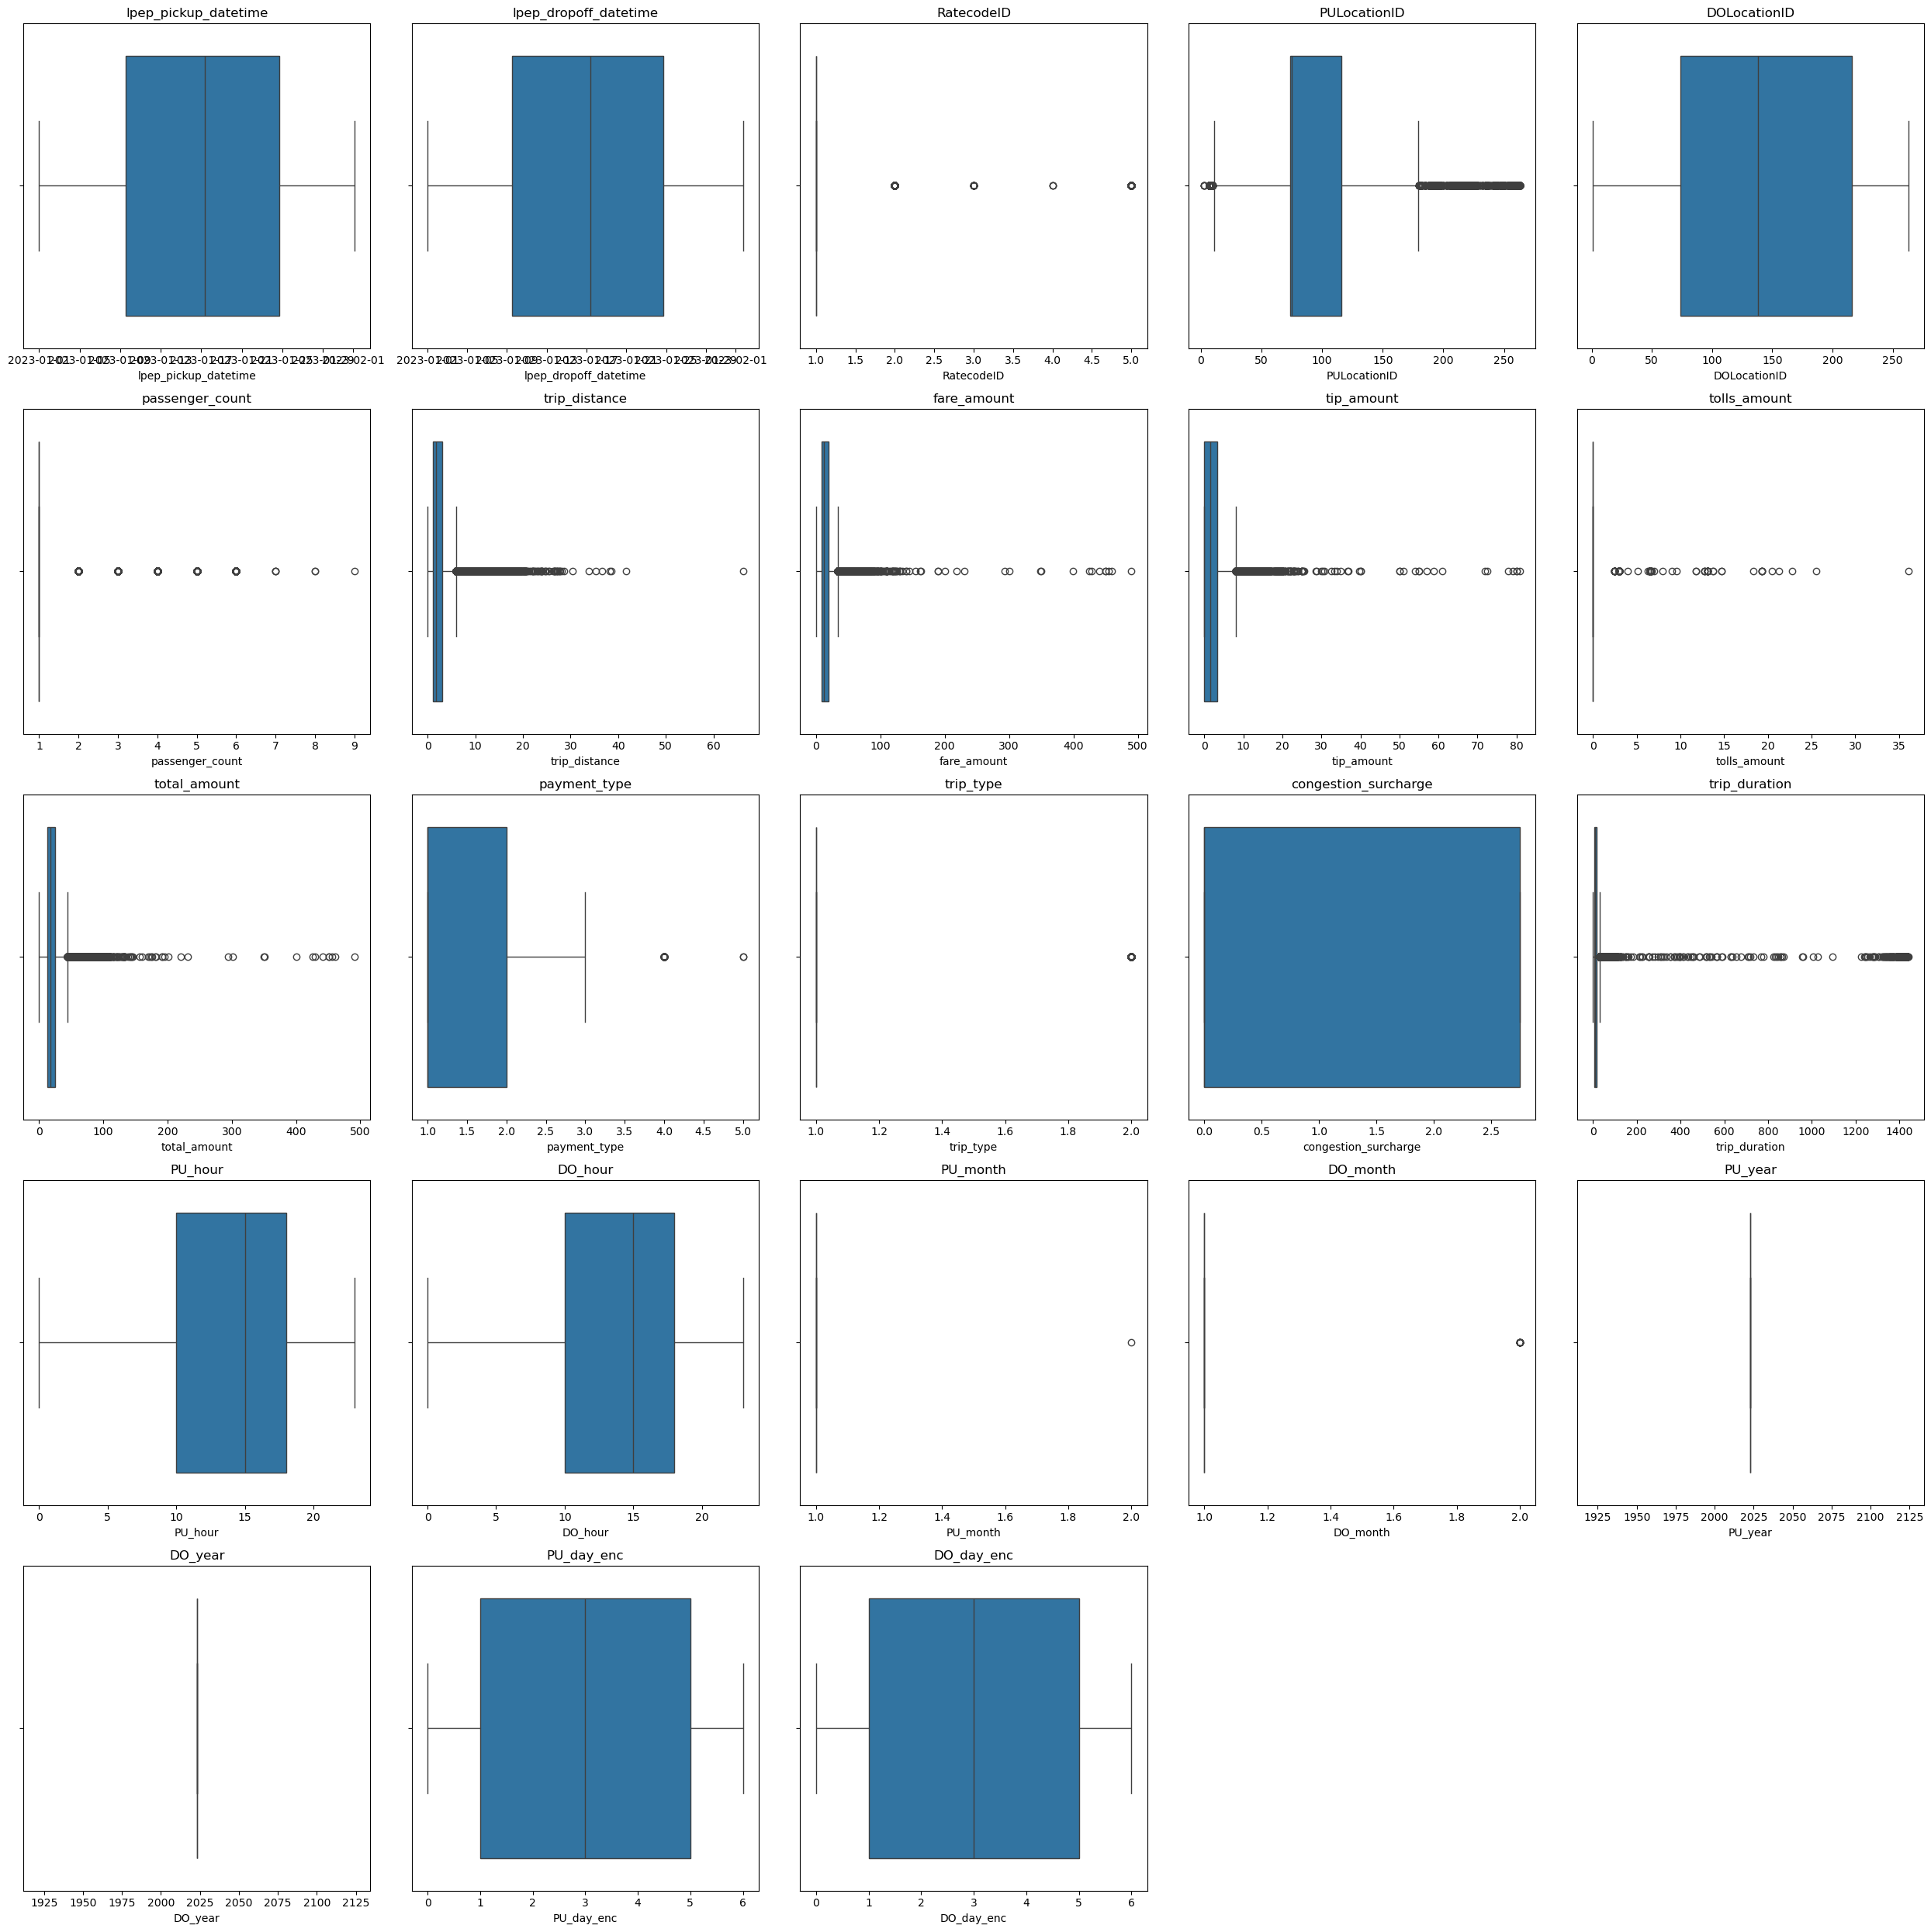

In [55]:
plt.figure(figsize=(25, 25))  

for index, kolom in enumerate(cols_num, 1):
    plt.subplot(5, 5, index)  
    sns.boxplot(x = df[kolom])            # Boxplot tiap kolom
    plt.title(kolom)                      
    plt.tight_layout()                    # Atur agar subplot tidak tumpang tindih


plt.show()

In [56]:
float_cols = df.select_dtypes(include=['float64']).columns
float_cols

Index(['RatecodeID', 'passenger_count', 'trip_distance', 'fare_amount',
       'tip_amount', 'tolls_amount', 'total_amount', 'payment_type',
       'trip_type', 'congestion_surcharge', 'trip_duration'],
      dtype='object')

Jumlah data outlier berdsarakan statistik z-score

In [57]:
from scipy import stats

z_scores = stats.zscore(df[float_cols])
outliers = (z_scores > 3) | (z_scores < -3)

outliers_index = df[outliers.any(axis=1)].index
print(len(outliers_index))
percentage = ((len(outliers_index)/len(df))*100)
print(f'{round(percentage,2)} % dari {len(df)} data adalah outlier')

6948
11.03 % dari 63013 data adalah outlier


Jumlah data outlier berdasarkan IQR

In [58]:
Q1 = df[float_cols].quantile(0.25)
Q3 = df[float_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = (df[float_cols] < (Q1 - 1.5 * IQR)) | (df[float_cols] > (Q3 + 1.5 * IQR))
outliers_index = df[outliers.any(axis=1)].index
print(len(outliers_index))
percentage = ((len(outliers_index) / len(df)) * 100)
print(f'{round(percentage, 2)} % dari {len(df)} data adalah outlier')

16146
25.62 % dari 63013 data adalah outlier


Namun, karena data ini adalah data preferensi pengguna (taxi), dan data pengguna memiliki makna tertentu, maka outlier yang terdeteksi berdasarkan kedua metode diatas dianggap sebagai data non-outlier

#### 3.11. Create clean dataframe

In [59]:
df.columns

Index(['lpep_pickup_datetime', 'lpep_dropoff_datetime', 'RatecodeID',
       'PULocationID', 'DOLocationID', 'passenger_count', 'trip_distance',
       'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
       'payment_type', 'trip_type', 'congestion_surcharge', 'trip_duration',
       'PU_hour', 'DO_hour', 'PU_month', 'DO_month', 'PU_year', 'DO_year',
       'PU_day', 'DO_day', 'PU_borough', 'PU_zone', 'PU_service_zone',
       'DO_borough', 'DO_zone', 'DO_service_zone', 'route_borough',
       'route_zone', 'route_service_zone', 'PU_day_enc', 'DO_day_enc',
       'PU_hour_cat', 'DO_hour_cat', 'PU_day_cat', 'DO_day_cat', 'dist_cat',
       'durat_cat'],
      dtype='object')

In [60]:
df_clean = df[[
 'lpep_pickup_datetime', 'lpep_dropoff_datetime', 
 'PU_month', 'PU_day', 'PU_hour',
 'DO_month', 'DO_day', 'DO_hour',

 'PULocationID', 'PU_borough', 'PU_zone', 'PU_service_zone', 
 'DOLocationID', 'DO_borough', 'DO_zone', 'DO_service_zone', 
 'route_borough', 'route_zone', 'route_service_zone',

 'trip_distance', 'trip_duration', 'passenger_count',
 'RatecodeID', 'trip_type',

 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount', 
 'payment_type', 'congestion_surcharge',
 
 'PU_day_enc', 'DO_day_enc', 'PU_hour_cat', 'DO_hour_cat', 
 'PU_day_cat', 'DO_day_cat', 'dist_cat', 'durat_cat']

]

In [61]:
df_clean[['passenger_count', 'RatecodeID', 'trip_type', 'payment_type']] = df_clean[['passenger_count', 'RatecodeID', 'trip_type', 'payment_type']].astype('int64')

C:\Users\Huwaida Nur Asysyifa\AppData\Local\Temp\ipykernel_60224\2055372001.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[['passenger_count', 'RatecodeID', 'trip_type', 'payment_type']] = df_clean[['passenger_count', 'RatecodeID', 'trip_type', 'payment_type']].astype('int64')


In [62]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63013 entries, 0 to 484168
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   lpep_pickup_datetime   63013 non-null  datetime64[ns]
 1   lpep_dropoff_datetime  63013 non-null  datetime64[ns]
 2   PU_month               63013 non-null  int32         
 3   PU_day                 63013 non-null  object        
 4   PU_hour                63013 non-null  int32         
 5   DO_month               63013 non-null  int32         
 6   DO_day                 63013 non-null  object        
 7   DO_hour                63013 non-null  int32         
 8   PULocationID           63013 non-null  int64         
 9   PU_borough             63013 non-null  object        
 10  PU_zone                63013 non-null  object        
 11  PU_service_zone        63013 non-null  object        
 12  DOLocationID           63013 non-null  int64         
 13  DO_bo

In [64]:
df_clean.to_csv('./data/NYC TLC Trip Record Clean.csv')

In [65]:
df_clean['index'] = range(len(df_clean))

C:\Users\Huwaida Nur Asysyifa\AppData\Local\Temp\ipykernel_60224\1661537487.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['index'] = range(len(df_clean))


In [66]:
df_clean['index'].nunique()

63013

In [67]:
df_clean.to_csv('./data/Data Clean.csv')

In [68]:
df_clean.head(10)

,lpep_pickup_datetime,lpep_dropoff_datetime,PU_month,PU_day,PU_hour,DO_month,DO_day,DO_hour,PULocationID,PU_borough,...,congestion_surcharge,PU_day_enc,DO_day_enc,PU_hour_cat,DO_hour_cat,PU_day_cat,DO_day_cat,dist_cat,durat_cat,index
0,2023-01-01 00:26:10,2023-01-01 00:37:11,1,Sunday,0,1,Sunday,0,166,Manhattan,...,2.75,0,0,midnight,midnight,weekend,weekend,1.5 - 3 miles,10 - 20 minutes,0
1,2023-01-01 00:51:03,2023-01-01 00:57:49,1,Sunday,0,1,Sunday,0,24,Manhattan,...,0.00,0,0,midnight,midnight,weekend,weekend,1.5 - 3 miles,0 - 10 minutes,1
2,2023-01-01 00:35:12,2023-01-01 00:41:32,1,Sunday,0,1,Sunday,0,223,Queens,...,0.00,0,0,midnight,midnight,weekend,weekend,0 - 1.5 miles,0 - 10 minutes,2
7,2023-01-01 00:13:14,2023-01-01 00:19:03,1,Sunday,0,1,Sunday,0,41,Manhattan,...,0.00,0,0,midnight,midnight,weekend,weekend,0 - 1.5 miles,0 - 10 minutes,3
10,2023-01-01 00:33:04,2023-01-01 00:39:02,1,Sunday,0,1,Sunday,0,41,Manhattan,...,0.00,0,0,midnight,midnight,weekend,weekend,0 - 1.5 miles,0 - 10 minutes,4
15,2023-01-01 00:53:31,2023-01-01 01:11:04,1,Sunday,0,1,Sunday,1,41,Manhattan,...,2.75,0,0,midnight,morning,weekend,weekend,1.5 - 3 miles,10 - 20 minutes,5
16,2023-01-01 00:09:14,2023-01-01 00:26:39,1,Sunday,0,1,Sunday,0,181,Brooklyn,...,2.75,0,0,midnight,midnight,weekend,weekend,3 - 5 miles,10 - 20 minutes,6
17,2023-01-01 00:11:58,2023-01-01 00:24:55,1,Sunday,0,1,Sunday,0,24,Manhattan,...,0.00,0,0,midnight,midnight,weekend,weekend,1.5 - 3 miles,10 - 20 minutes,7
18,2023-01-01 00:41:29,2023-01-01 00:46:26,1,Sunday,0,1,Sunday,0,41,Manhattan,...,0.00,0,0,midnight,midnight,weekend,weekend,0 - 1.5 miles,0 - 10 minutes,8
22,2023-01-01 00:50:32,2023-01-01 01:13:42,1,Sunday,0,1,Sunday,1,24,Manhattan,...,2.75,0,0,midnight,morning,weekend,weekend,3 - 5 miles,20 - 30 minutes,9


## **4. Exploratory Data Analysis (EDA)**

#### 4.1. Categorical Data

In [69]:
df_clean.describe(include='object')

,PU_day,DO_day,PU_borough,PU_zone,PU_service_zone,DO_borough,DO_zone,DO_service_zone,route_borough,route_zone,route_service_zone,PU_hour_cat,DO_hour_cat,PU_day_cat,DO_day_cat,dist_cat,durat_cat
count,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013,63013
unique,7,7,5,217,3,6,245,4,25,4952,11,5,5,2,2,5,5
top,Tuesday,Tuesday,Manhattan,East Harlem North,Boro Zone,Manhattan,East Harlem South,Boro Zone,Manhattan - Manhattan,East Harlem North - East Harlem South,Boro Zone - Boro Zone,afternoon,afternoon,weekday,weekday,0 - 1.5 miles,0 - 10 minutes
freq,10468,10456,37284,12907,59085,37303,3396,40858,34928,1969,40203,21065,20643,47516,47501,25049,27269


In [70]:
cols_cat = [col for col in df_clean.describe(include='object').columns]
cols_cat

['PU_day',
 'DO_day',
 'PU_borough',
 'PU_zone',
 'PU_service_zone',
 'DO_borough',
 'DO_zone',
 'DO_service_zone',
 'route_borough',
 'route_zone',
 'route_service_zone',
 'PU_hour_cat',
 'DO_hour_cat',
 'PU_day_cat',
 'DO_day_cat',
 'dist_cat',
 'durat_cat']

In [71]:
len(cols_cat)

17

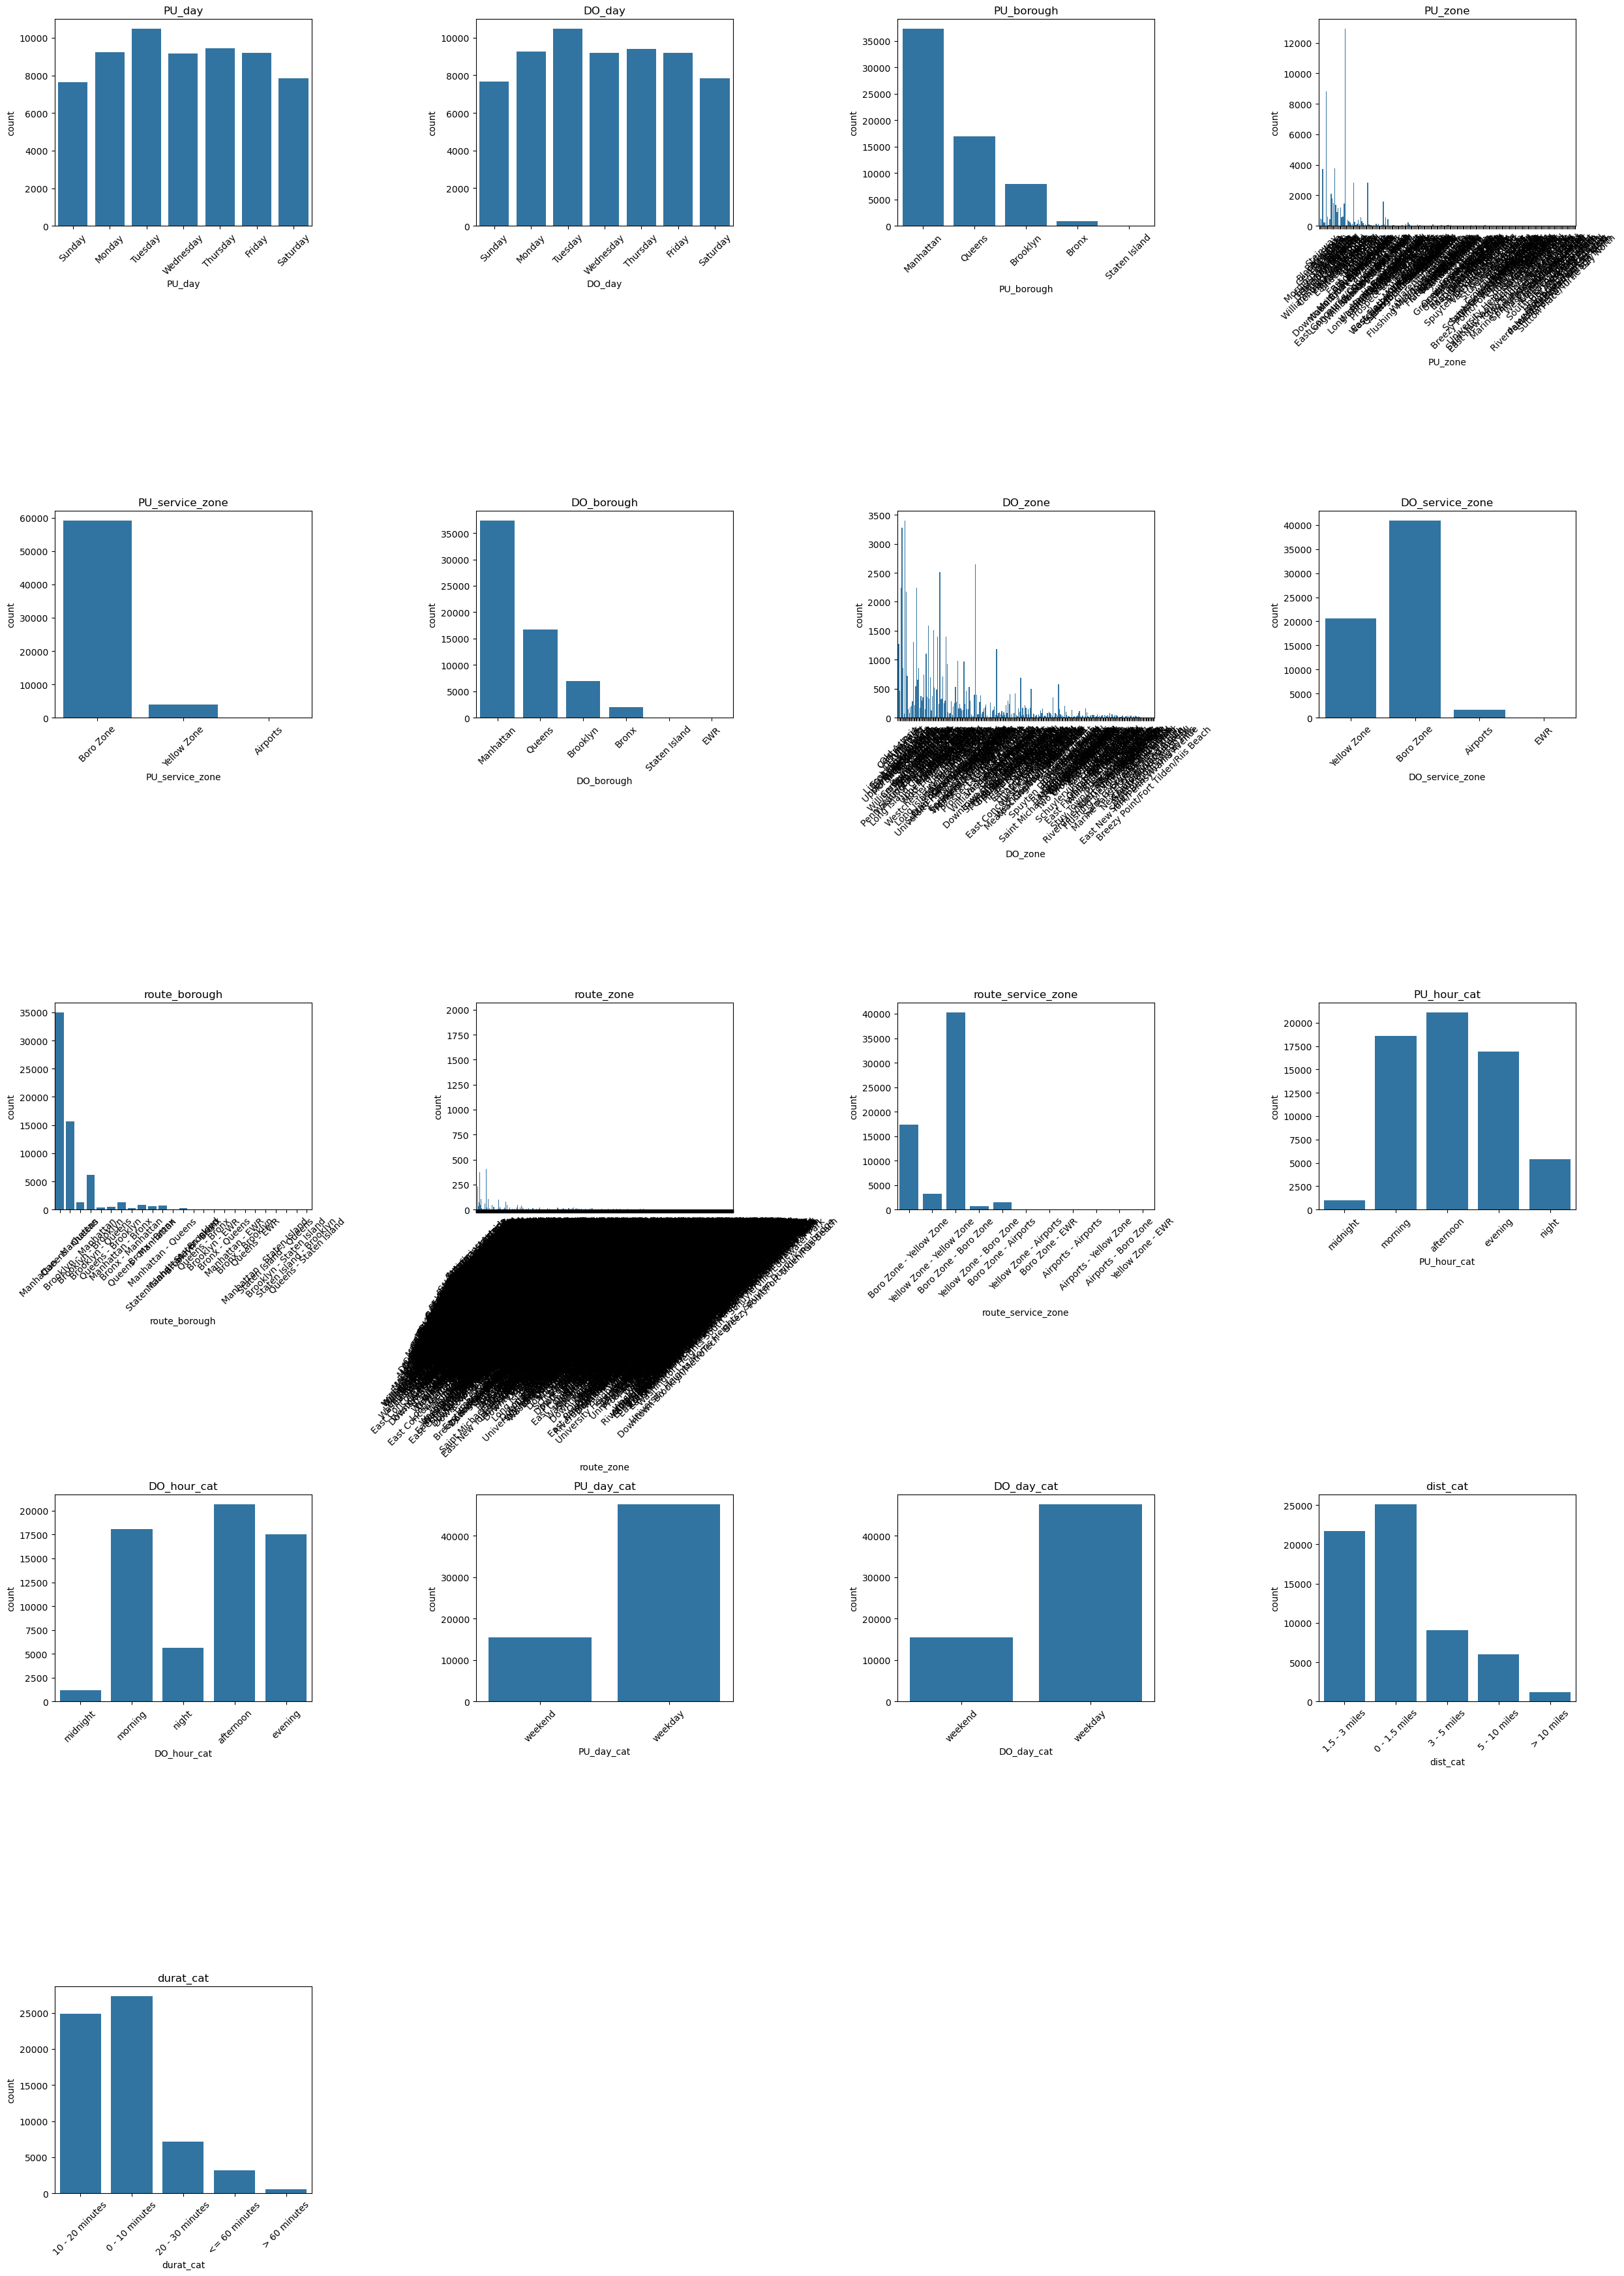

In [72]:
plt.figure(figsize=(25, 35))  

for index, kolom in enumerate(cols_cat, 1):
    plt.subplot(5, 4, index)  
    sns.countplot(x = df_clean[kolom])            # Boxplot tiap kolom
    plt.title(kolom) 
    plt.xticks(rotation=45)                     
    plt.tight_layout()                    # Atur agar subplot tidak tumpang tindih

plt.show()

In [73]:
for col in cols_cat:
    print(f'\ncategory frequency for column {col}')
    cat_freq = pd.DataFrame(df_clean[col].value_counts().reset_index())
    display(cat_freq)


category frequency for column PU_day


,PU_day,count
0,Tuesday,10468
1,Thursday,9432
2,Monday,9243
3,Friday,9196
4,Wednesday,9177
5,Saturday,7847
6,Sunday,7650



category frequency for column DO_day


,DO_day,count
0,Tuesday,10456
1,Thursday,9409
2,Monday,9253
3,Wednesday,9194
4,Friday,9189
5,Saturday,7838
6,Sunday,7674



category frequency for column PU_borough


,PU_borough,count
0,Manhattan,37284
1,Queens,16940
2,Brooklyn,7896
3,Bronx,881
4,Staten Island,12



category frequency for column PU_zone


,PU_zone,count
0,East Harlem North,12907
1,East Harlem South,8806
2,Forest Hills,3789
3,Central Harlem,3713
4,Morningside Heights,3589
...,...,...
212,City Island,1
213,Garment District,1
214,Greenwich Village South,1
215,Murray Hill,1



category frequency for column PU_service_zone


,PU_service_zone,count
0,Boro Zone,59085
1,Yellow Zone,3898
2,Airports,30



category frequency for column DO_borough


,DO_borough,count
0,Manhattan,37303
1,Queens,16739
2,Brooklyn,6903
3,Bronx,2033
4,EWR,20
5,Staten Island,15



category frequency for column DO_zone


,DO_zone,count
0,East Harlem South,3396
1,East Harlem North,3280
2,Upper East Side North,2652
3,Central Harlem,2515
4,Central Harlem North,2242
...,...,...
240,Charleston/Tottenville,1
241,Green-Wood Cemetery,1
242,Mariners Harbor,1
243,South Beach/Dongan Hills,1



category frequency for column DO_service_zone


,DO_service_zone,count
0,Boro Zone,40858
1,Yellow Zone,20542
2,Airports,1593
3,EWR,20



category frequency for column route_borough


,route_borough,count
0,Manhattan - Manhattan,34928
1,Queens - Queens,15595
2,Brooklyn - Brooklyn,6184
3,Manhattan - Bronx,1349
4,Brooklyn - Manhattan,1325
5,Queens - Manhattan,827
6,Manhattan - Queens,767
7,Bronx - Bronx,608
8,Queens - Brooklyn,471
9,Brooklyn - Queens,342



category frequency for column route_zone


,route_zone,count
0,East Harlem North - East Harlem South,1969
1,East Harlem South - East Harlem North,1427
2,Forest Hills - Forest Hills,1195
3,East Harlem North - Upper East Side North,1166
4,East Harlem North - Central Harlem,952
...,...,...
4947,Woodhaven - East Williamsburg,1
4948,Woodside - East New York,1
4949,Williamsburg (North Side) - Garment District,1
4950,Belmont - Riverdale/North Riverdale/Fieldston,1



category frequency for column route_service_zone


,route_service_zone,count
0,Boro Zone - Boro Zone,40203
1,Boro Zone - Yellow Zone,17319
2,Yellow Zone - Yellow Zone,3222
3,Boro Zone - Airports,1544
4,Yellow Zone - Boro Zone,645
5,Yellow Zone - Airports,30
6,Boro Zone - EWR,19
7,Airports - Airports,19
8,Airports - Boro Zone,10
9,Airports - Yellow Zone,1



category frequency for column PU_hour_cat


,PU_hour_cat,count
0,afternoon,21065
1,morning,18615
2,evening,16917
3,night,5399
4,midnight,1017



category frequency for column DO_hour_cat


,DO_hour_cat,count
0,afternoon,20643
1,morning,18042
2,evening,17530
3,night,5651
4,midnight,1147



category frequency for column PU_day_cat


,PU_day_cat,count
0,weekday,47516
1,weekend,15497



category frequency for column DO_day_cat


,DO_day_cat,count
0,weekday,47501
1,weekend,15512



category frequency for column dist_cat


,dist_cat,count
0,0 - 1.5 miles,25049
1,1.5 - 3 miles,21697
2,3 - 5 miles,9059
3,5 - 10 miles,5995
4,> 10 miles,1213



category frequency for column durat_cat


,durat_cat,count
0,0 - 10 minutes,27269
1,10 - 20 minutes,24843
2,20 - 30 minutes,7127
3,<= 60 minutes,3226
4,> 60 minutes,548


#### 4.2. Numerical Data

In [74]:
cols_int = [col for col in df_clean.select_dtypes('int64').columns]
cols_int

['PULocationID',
 'DOLocationID',
 'passenger_count',
 'RatecodeID',
 'trip_type',
 'payment_type',
 'PU_day_enc',
 'DO_day_enc',
 'index']

In [75]:
cols_float = [col for col in df_clean.select_dtypes('float64').columns]
cols_float

['trip_distance',
 'trip_duration',
 'fare_amount',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge']

In [76]:
print(len(cols_int))
print(len(cols_float))

9
7


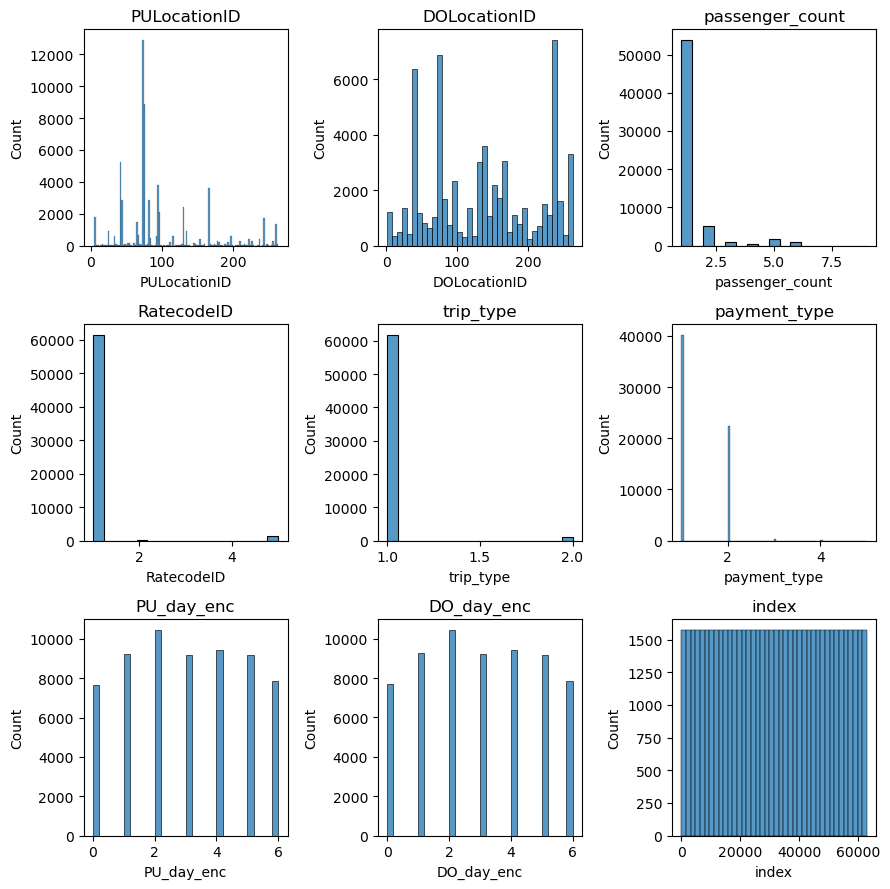

In [77]:
plt.figure(figsize=(9, 9))  

for index, kolom in enumerate(cols_int, 1):
    plt.subplot(3, 3, index)  
    sns.histplot(df_clean[kolom])            
    plt.title(kolom)                      
    plt.tight_layout()                    

plt.show()

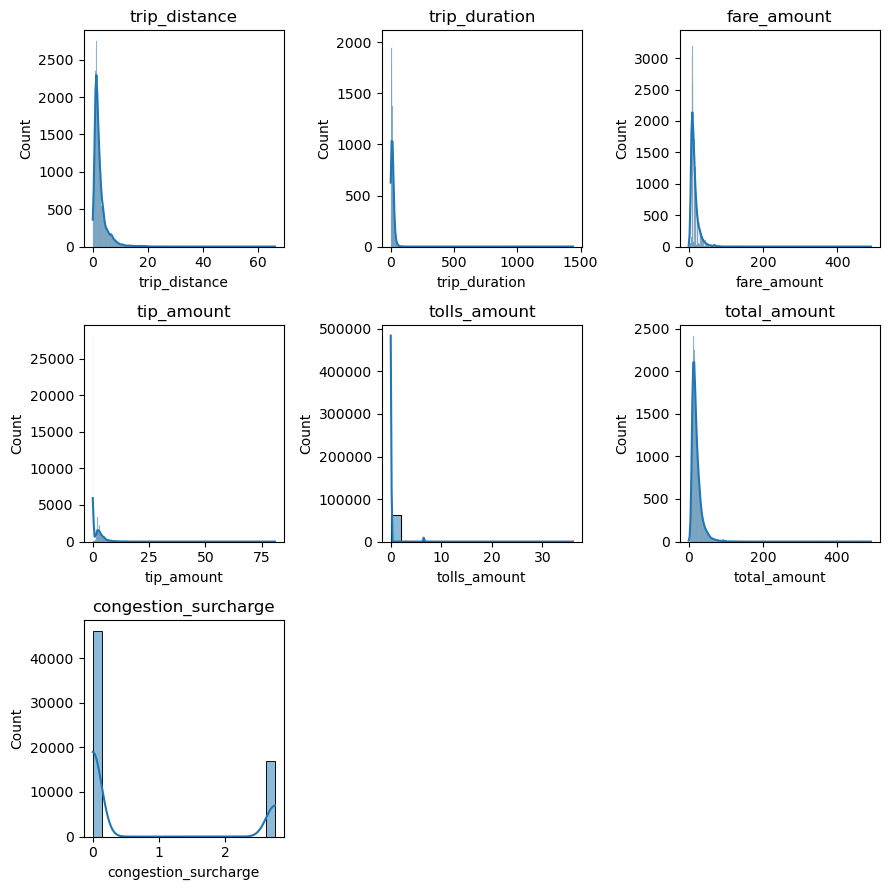

In [ ]:
plt.figure(figsize=(9, 9))  

for index, kolom in enumerate(cols_float, 1):
    plt.subplot(3, 3, index)  
    sns.histplot(df_clean[kolom], kde=True)            
    plt.title(kolom)                      
    plt.tight_layout()                    

plt.show()

#### 4.3. Analysis

In [78]:
cols_num = [col for col in df_clean.describe()]
len(cols_num)

22

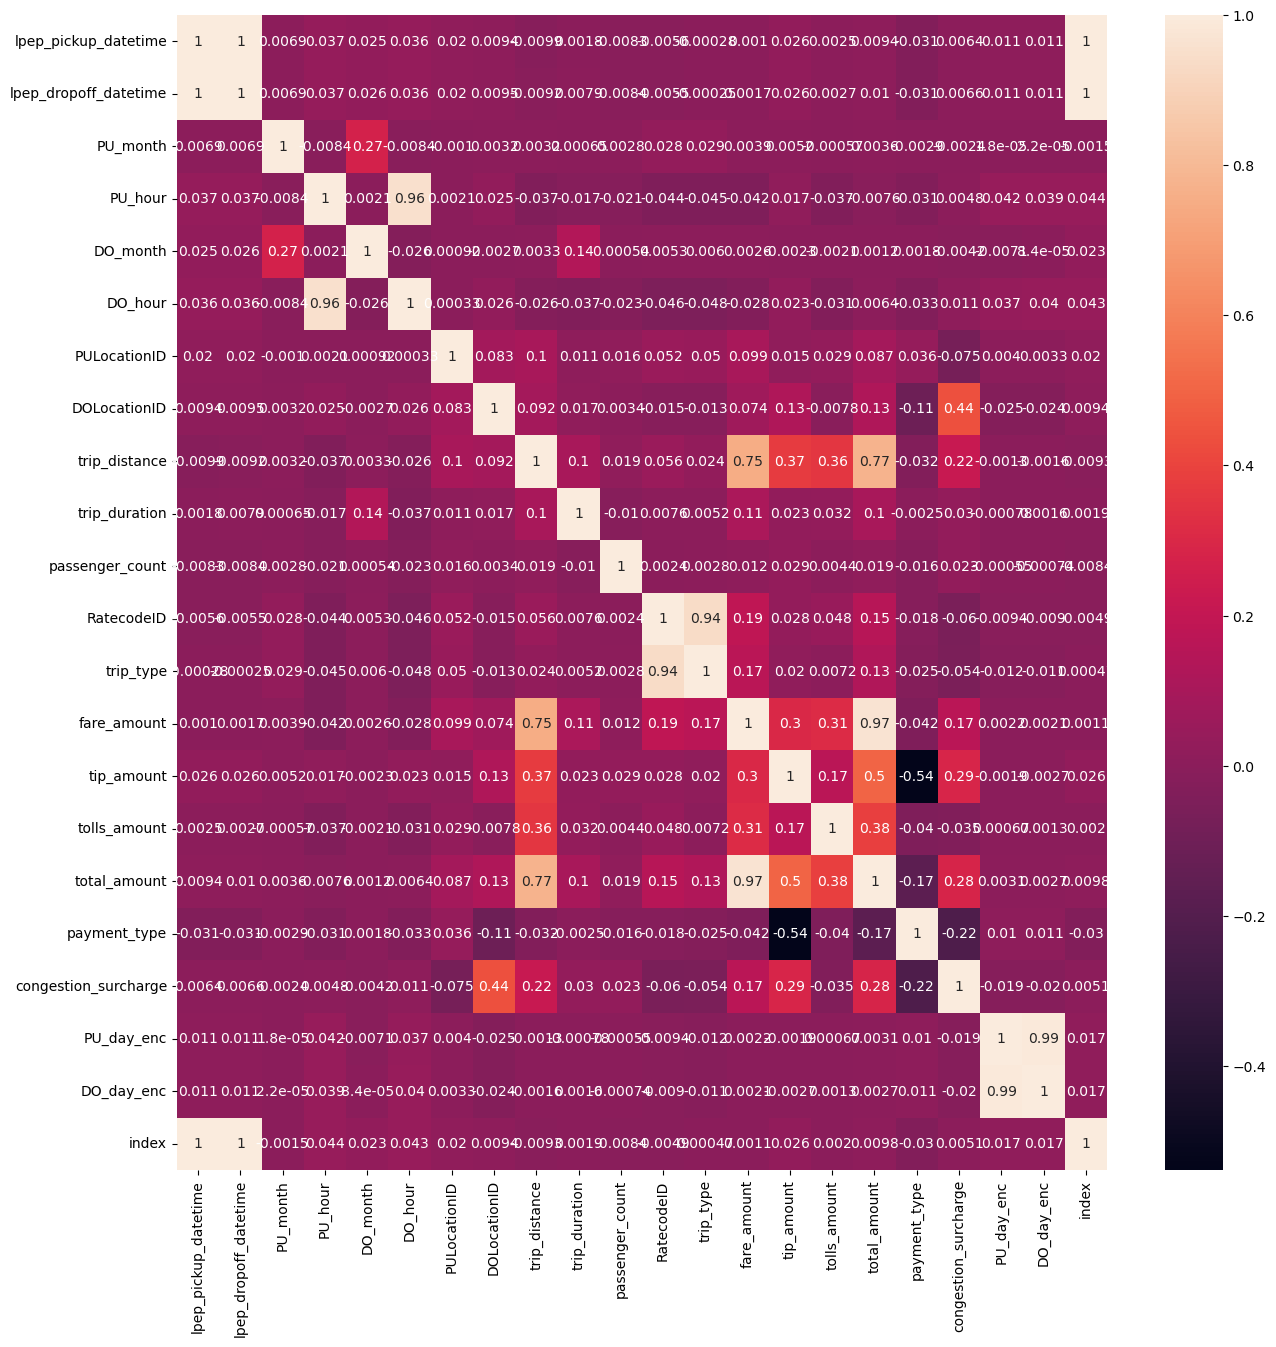

In [79]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean[cols_num].corr(), annot=True);

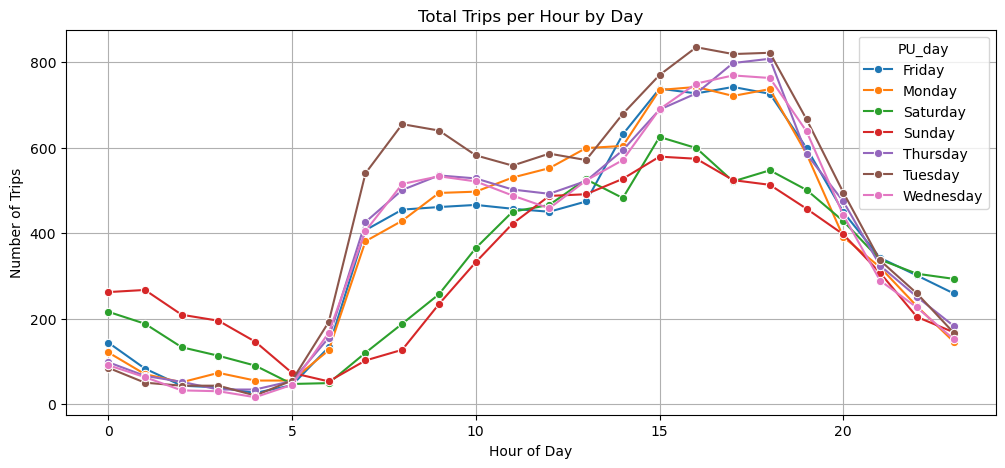

In [80]:
# time analysis
hourly_trips = df_clean.groupby(['PU_hour', 'PU_day']).size().reset_index(name='count')

plt.figure(figsize=(12, 5))
sns.lineplot(data=hourly_trips, x='PU_hour', y='count', hue='PU_day', marker='o')
#hourly_trips.plot(kind='line', color='blue', marker = 'o')
plt.title('Total Trips per Hour by Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

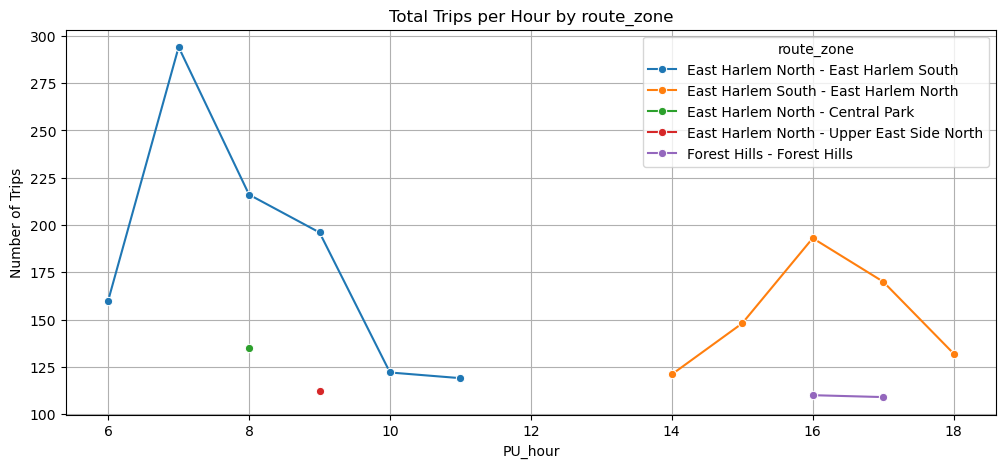

In [81]:
route_zone_ = df_clean.groupby(['PU_hour','route_zone']).size().reset_index(name = 'count')
top15 = route_zone_.sort_values(by='count', ascending=False).head(15)

plt.figure(figsize=(12, 5))
sns.lineplot(data=top15, hue='route_zone', y='count', x='PU_hour', marker='o')
plt.title('Total Trips per Hour by route_zone')
plt.ylabel('Number of Trips')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

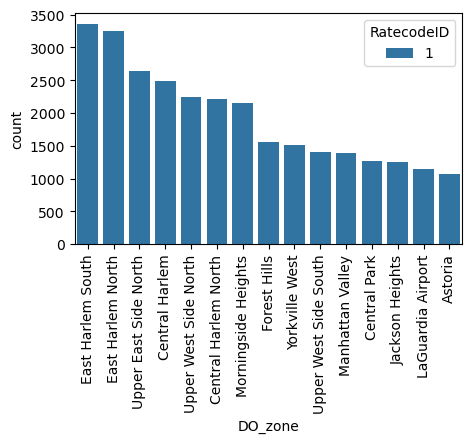

In [82]:
plt.figure(figsize=(5,3))
_ = df_clean.groupby(['DO_zone', 'RatecodeID']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(15)
sns.barplot(data=_, x='DO_zone', y='count',hue='RatecodeID')
plt.xticks(rotation=90);

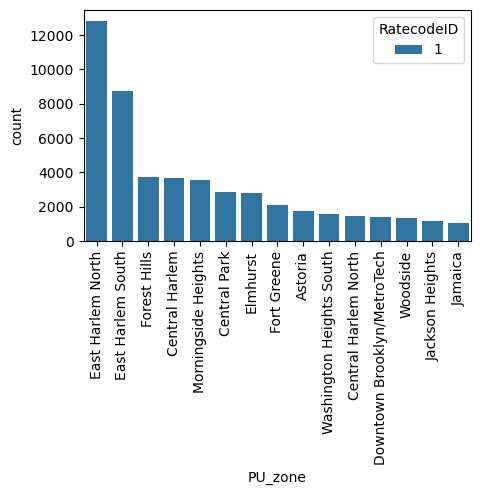

In [83]:
plt.figure(figsize=(5,3))
_ = df_clean.groupby(['RatecodeID', 'PU_zone',]).size().reset_index(name='count').sort_values(by='count', ascending=False).head(15)
sns.barplot(data=_, x='PU_zone', y='count',hue='RatecodeID')
plt.xticks(rotation=90);

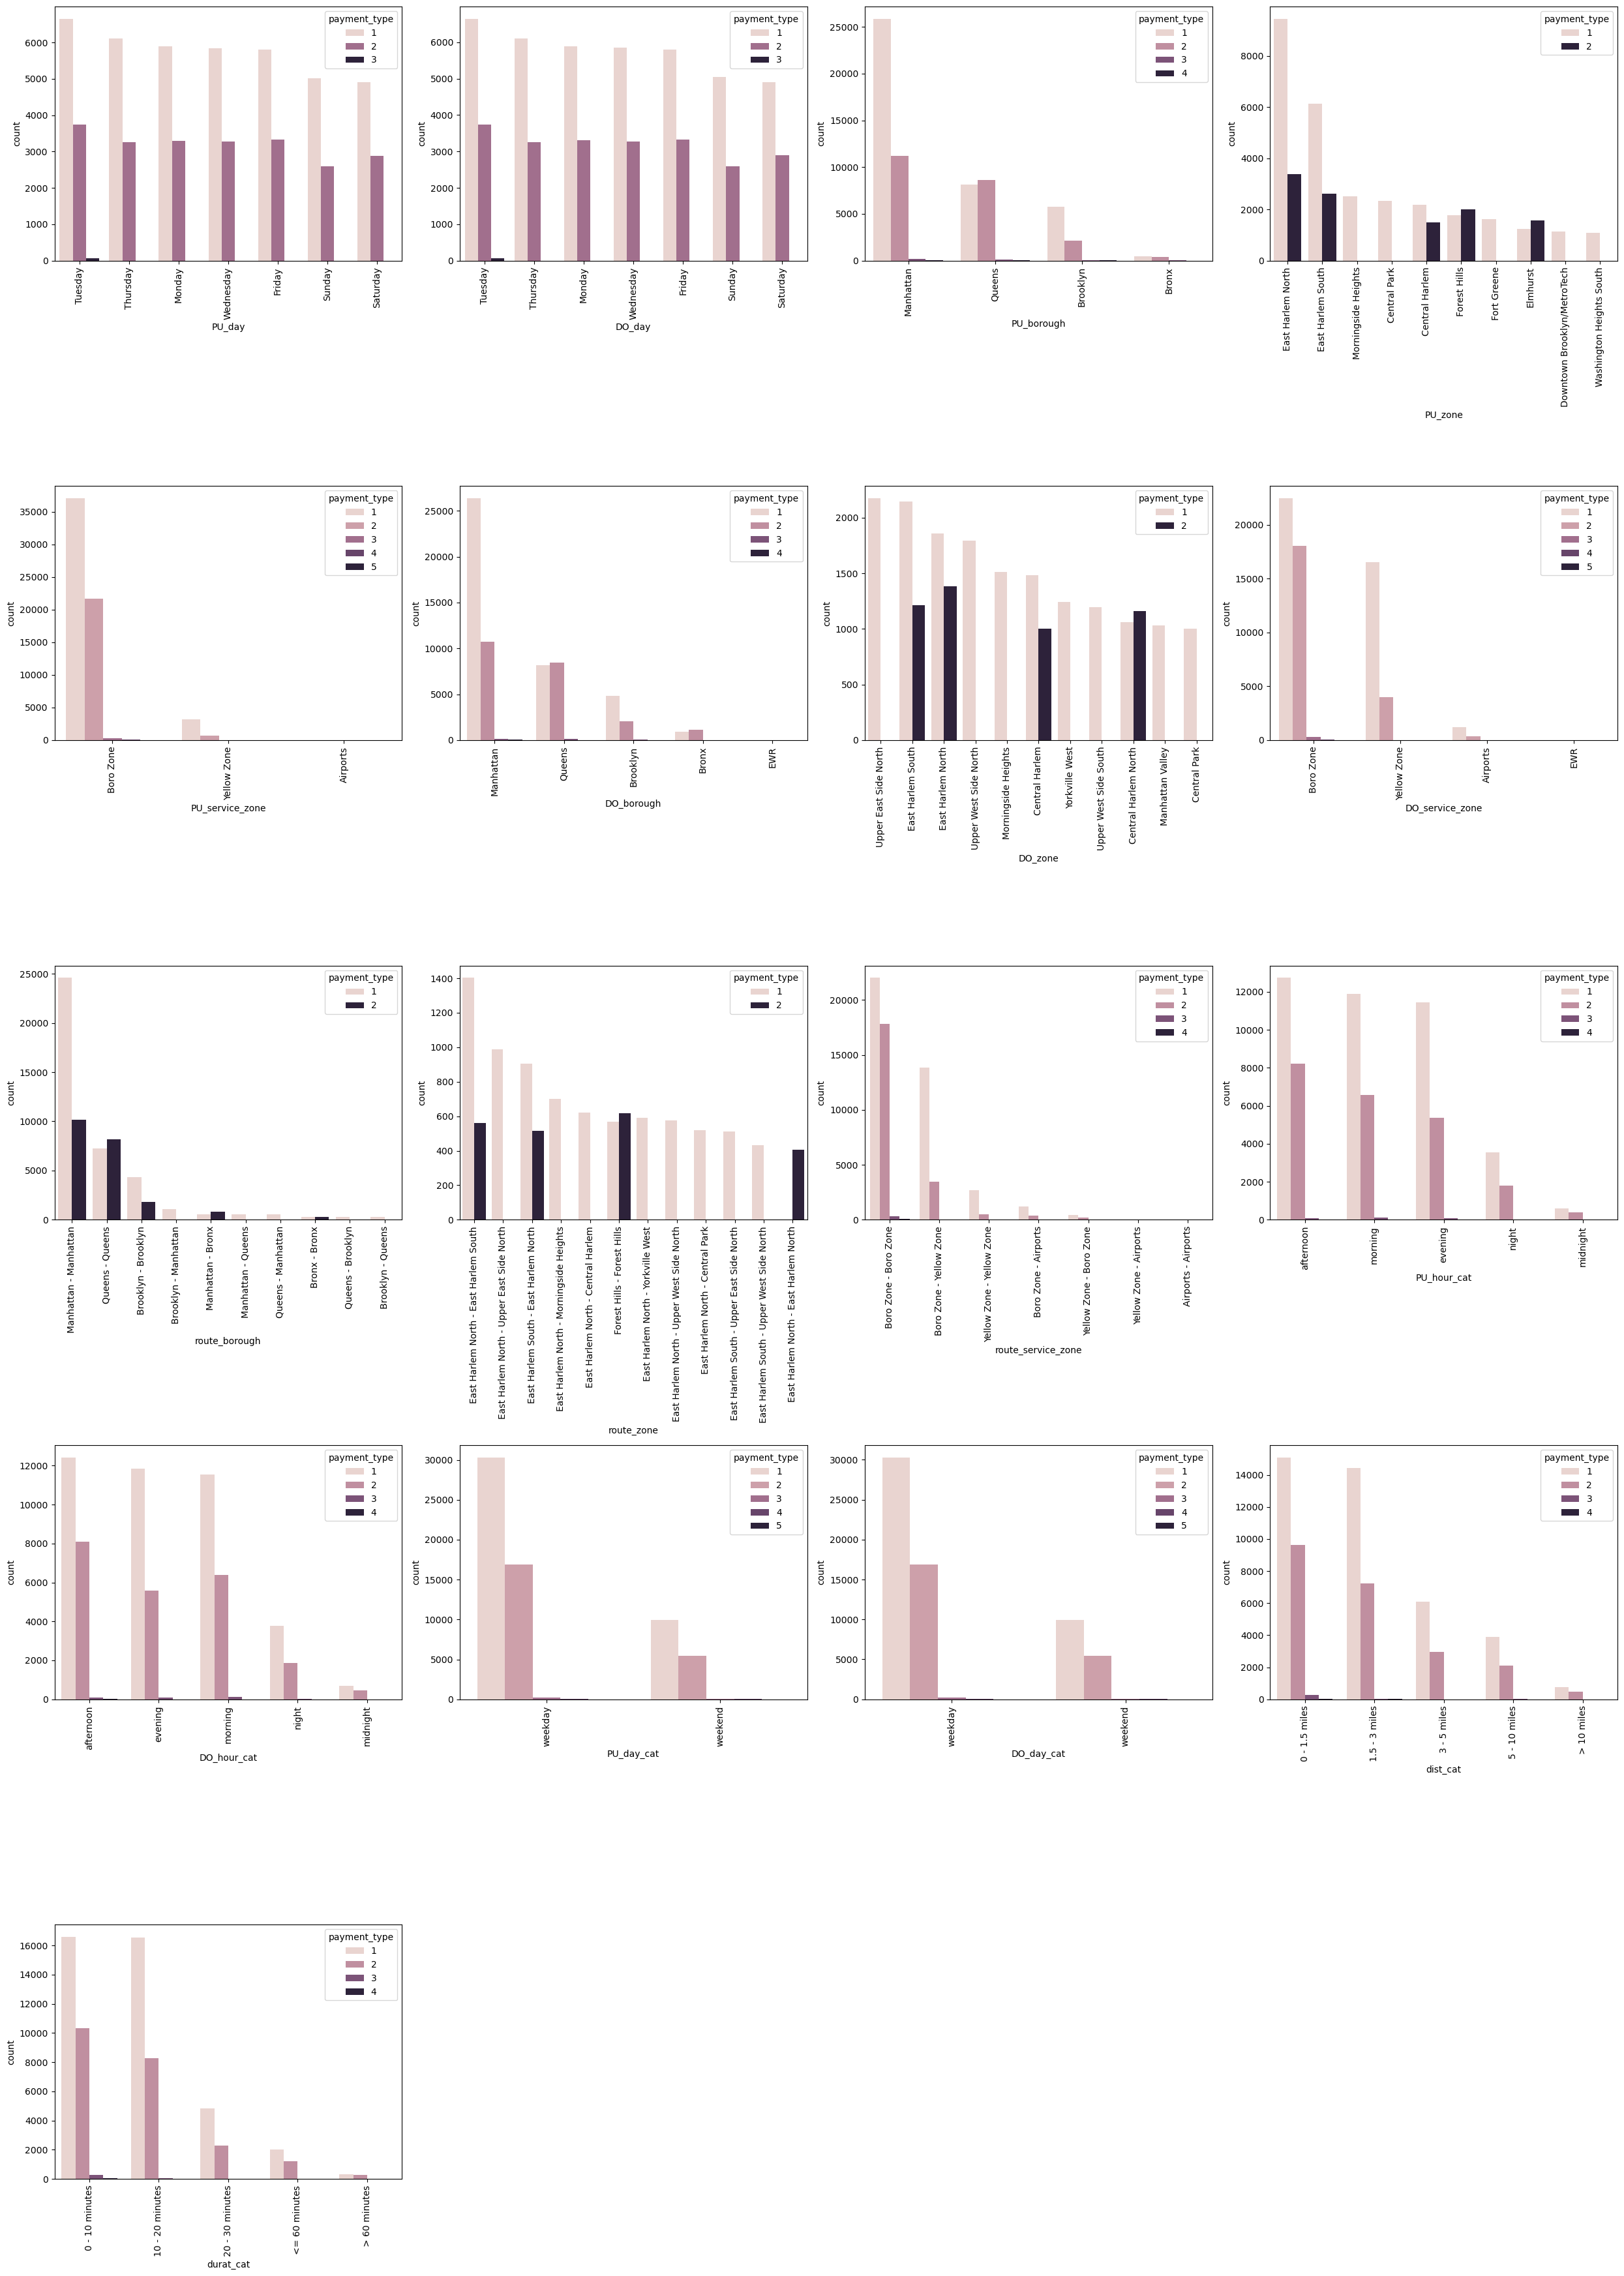

In [84]:
plt.figure(figsize=(25, 35))
for index, col in enumerate(cols_cat, 1):
    plt.subplot(5, 4, index)
    _ = df_clean.groupby([col, 'payment_type']).size().reset_index(name='count').sort_values(by='count', ascending=False).head(15)
    sns.barplot(data=_, x=col, y='count',hue='payment_type')
    plt.xticks(rotation=90)
    plt.tight_layout() 
plt.show();

In [85]:
df_clean['payment_type'].value_counts()

payment_type
1    40252
2    22372
3      326
4       61
5        2
Name: count, dtype: int64

In [86]:
df[df_clean['payment_type']==3][['payment_type', 'fare_amount']]

,payment_type,fare_amount
125,3.0,3.0
1013,3.0,90.0
3873,3.0,3.0
8629,3.0,8.6
9669,3.0,24.0
...,...,...
479927,3.0,3.0
479998,3.0,3.0
481279,3.0,3.0
482250,3.0,2.5


In [87]:
hourly_trips = df_clean.groupby(df_clean['PU_hour'])[['PU_day']].count().reset_index()
hourly_trips

,PU_hour,PU_day
0,0,1017
1,1,787
2,2,563
3,3,527
4,4,387
5,5,373
6,6,875
7,7,2381
8,8,2870
9,9,3154


## **5. Statistic Inferensial**

#### 5.1. Trip Revenue by Pickup Location Zones

- tidak ada hubungan antara zona penjemputan dan apakah suatu perjalanan memiliki pendapatan tinggi atau tidak.

**Statement H0**      : The distribution of high-revenue trips no varies significantly across different pickup zones.

**Hypothesis Test**: Chi-Square test of independence.

In [ ]:
# asumsi high revenue adalah data n teratas kolom total_amount

In [89]:
import pandas as pd
import scipy.stats as stats

df_clean['high_revenue'] = df_clean['total_amount'] > 50  

contingency_table = pd.crosstab(df_clean['PU_zone'], df_clean['high_revenue'])

#  uji Chi-Square
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Chi-Square Statistic:", chi2)
print("p-value:", p)

if p<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')


Chi-Square Statistic: 2987.0408500056965
p-value: 0.0
Tolak Ho


 Ada cukup bukti untuk **menolak H0**.
 
 terdapat **hubungan yang signifikan** antara **zona penjemputan (PU_zone) dan pendapatan tinggi (kategori high_revenue berdasarkan total_amount)**. Zona penjemputan tertentu memiliki kecenderungan yang lebih tinggi untuk menghasilkan perjalanan dengan pendapatan tinggi.

#### 5.2. Average Revenue Based on Pickup Time Categories

In [110]:
import pandas as pd

average_revenue_by_time = df_clean.groupby('PU_hour_cat')['total_amount'].mean()
average_revenue_by_time = pd.DataFrame(average_revenue_by_time).reset_index()
display(average_revenue_by_time)


,PU_hour_cat,total_amount
0,afternoon,21.174298
1,evening,21.256544
2,midnight,20.335113
3,morning,21.001678
4,night,20.492960


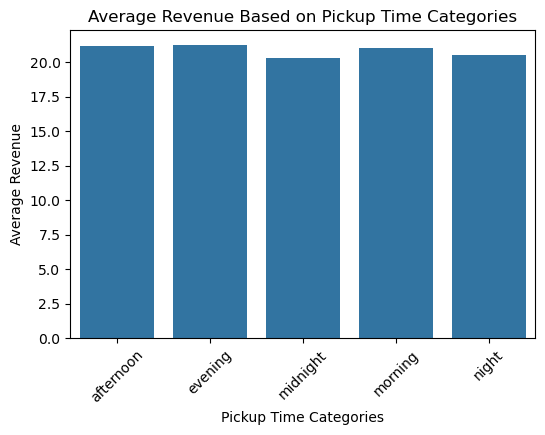

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.barplot(x=average_revenue_by_time.index, y=average_revenue_by_time.values)
plt.title('Average Revenue Based on Pickup Time Categories')
plt.xlabel('Pickup Time Categories')
plt.ylabel('Average Revenue')
plt.xticks(rotation=45)
plt.show()


-  tidak ada perbedaan yang signifikan antara median total_amount di berbagai kategori waktu (PU_hour_cat).

**Statement H0**      : The average revenue per trip varies no significantly different between time categories 

**Hypothesis Test**: Kruskal-Wallis test.

In [90]:
# cek distribusi kolom city_development_index
from scipy.stats import normaltest
stats, pval=normaltest(df_clean['total_amount'])
if pval<=0.05:
    print('tidak normal') #Ha
else: 
    print('distribusi normal') #Ho 

tidak normal


In [97]:
df_clean['PU_hour_cat'].unique()

array(['midnight', 'morning', 'afternoon', 'evening', 'night'],
      dtype=object)

In [101]:
import scipy.stats as stats
groups = [df_clean[df_clean['PU_hour_cat'] == cat]['total_amount'] for cat in df_clean['PU_hour_cat'].unique()]

kruskal_result = stats.kruskal(*groups)

print("Kruskal-Wallis Statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)
pvalue = kruskal_result.pvalue
if pvalue <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Kruskal-Wallis Statistic: 174.07444866207763
p-value: 1.3959828868281862e-36
Tolak Ho


In [ ]:
# total amount : jumlah total yang dibayar oleh penumpang 

 Ada cukup bukti untuk **menolak H0**.

 Terdapat **perbedaan yang signifikan** dalam jumlah total perjalanan (total_amount) yang diterima oleh taksi pada berbagai kategori waktu seperti midnight, morning, afternoon, evening, dan night.

#### 5.3. Payment Type and Tip Proportion

**Statement H0**      : The proportion of trips with tips no differs significantly between cash and non-cash payment types

**Hypothesis Test**: Proportion Z-test.

In [103]:
from statsmodels.stats.proportion import proportions_ztest

# dua kategori berdasarkan tipe pembayaran (1 untuk tunai, lainnya untuk non-tunai)
cash_tips = df_clean[(df_clean['payment_type'] == 1) & (df_clean['tip_amount'] > 0)]
non_cash_tips = df_clean[(df_clean['payment_type'] != 1) & (df_clean['tip_amount'] > 0)]

count_cash_tips = len(cash_tips)
count_non_cash_tips = len(non_cash_tips)

total_cash_trips = len(df_clean[df_clean['payment_type'] == 1])
total_non_cash_trips = len(df_clean[df_clean['payment_type'] != 1])

count = [count_cash_tips, count_non_cash_tips]
nobs = [total_cash_trips, total_non_cash_trips]
z_stat, p_value = proportions_ztest(count, nobs)

print("Z-Statistic:", z_stat)
print("p-value:", p_value)

if p_value<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Z-Statistic: 212.91479616149473
p-value: 0.0
Tolak Ho


**Z-Statistic:** Nilai Z sebesar 212.91 menunjukkan bahwa perbedaan antara proporsi yang diuji dengan proporsi yang diharapkan berada jauh di luar nilai kritis standar (biasanya ±1.96 untuk uji dua arah pada tingkat signifikansi 0.05)

**pvalue** perbedaan yang ditemukan dalam proporsi data sangat mungkin nyata dan bukan akibat dari fluktuasi acak.


 Ada cukup bukti untuk **menolak H0**.

proporsi perjalanan dengan tips berbeda secara signifikan antara jenis pembayaran tunai dan non-tunai.
Artinya, ada perbedaan yang sangat signifikan dalam perilaku pemberian tips antara pelanggan yang membayar dengan tunai dan pelanggan yang membayar dengan metode non-tunai.